In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L4/'
foldername = '../../MFUs/Runs_15-09-20_EasyPhase_L4/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_02-12-20_nsms524288x4_nips2/'
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist = ['KEasyPhase_L4_it0_nsm524288_folder/backup',
                'KEasyPhase_L4_it1_nsm524288_folder/backup',
                #'KEasyPhase_L4_it2_nsm524288_folder/backup',
                #'KEasyPhase_L4_it3_nsm524288_folder/backup',
                #'KEasyPhase_L4_it4_nsm524288_folder/backup',
                #'KEasyPhase_L4_it5_nsm524288_folder/backup',
                #'KEasyPhase_L4_it6_nsm524288_folder/backup',
                #nh#'KEasyPhase_L4_it7_nsm524288_folder/backup',
                #'KEasyPhase_L4_it8_nsm524288_folder/backup',
                #'KEasyPhase_L4_it9_nsm524288_folder/backup',
                #'KEasyPhase_L4_it10_nsm524288_folder/backup',
                #'KEasyPhase_L4_it11_nsm524288_folder/backup',
                #'KEasyPhase_L4_it12_nsm524288_folder/backup',
                #'KEasyPhase_L4_it13_nsm524288_folder/backup',
                #'KEasyPhase_L4_it14_nsm524288_folder/backup',
                #'KEasyPhase_L4_it15_nsm524288_folder/backup',
                #'KEasyPhase_L4_it16_nsm524288_folder/backup',
                #'KEasyPhase_L4_it17_nsm524288_folder/backup',
                #'KEasyPhase_L4_it18_nsm524288_folder/backup',
                #'KEasyPhase_L4_it19_nsm524288_folder/backup',
                #'KEasyPhase_L4_it20_nsm524288_folder/backup',
                #'KEasyPhase_L4_it21_nsm524288_folder/backup',
                #'KEasyPhase_L4_it22_nsm524288_folder/backup',
                #'KEasyPhase_L4_it23_nsm524288_folder/backup',
                #'KEasyPhase_L4_it24_nsm524288_folder/backup',
                #'KEasyPhase_L4_it25_nsm524288_folder/backup',
                #'KEasyPhase_L4_it26_nsm524288_folder/backup',
                #'KEasyPhase_L4_it27_nsm524288_folder/backup',
                'KEasyPhase_L4_it28_nsm524288_folder/backup',
                'KEasyPhase_L4_it29_nsm524288_folder/backup',
                'KEasyPhase_L4_it30_nsm524288_folder/backup',
                'KEasyPhase_L4_it31_nsm524288_folder/backup'
               ]
filenamelist = ['KEasyPhase_L4_it0_nsm524288_folder/backup',
                'KEasyPhase_L4_it1_nsm524288_folder/backup',
                'KEasyPhase_L4_it2_nsm524288_folder/backup',
                'KEasyPhase_L4_it3_nsm524288_folder/backup']
filenamelist = ['KEasyPhase_L4_it0_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it0_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it0_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it0_nsm524288_nips2_restarted3_folder/backup',
                
                'KEasyPhase_L4_it1_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it1_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it1_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it1_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it2_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it2_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it2_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it2_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it3_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it3_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it3_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it3_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it4_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it4_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it4_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it4_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it5_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it5_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it5_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it5_nsm524288_nips2_restarted3_folder/backup',
                
                'KEasyPhase_L4_it6_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it6_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it6_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it6_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it7_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it7_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it7_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it7_nsm524288_nips2_restarted3_folder/backup',
                
                'KEasyPhase_L4_it8_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it8_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it8_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it8_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it9_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it9_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it9_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it9_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it10_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it10_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it10_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it10_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it11_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it11_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it11_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it11_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it12_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it12_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it12_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it12_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it13_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it13_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it13_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it13_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it14_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it14_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it14_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it14_nsm524288_nips2_restarted3_folder/backup',
                #
                'KEasyPhase_L4_it15_nsm524288_nips2_folder/backup',
                'KEasyPhase_L4_it15_nsm524288_nips2_restarted_folder/backup',
                'KEasyPhase_L4_it15_nsm524288_nips2_restarted2_folder/backup',
                'KEasyPhase_L4_it15_nsm524288_nips2_restarted3_folder/backup',
                
               ]
n = len(filenamelist)

In [4]:
mergeruns = True
groupruns = 4
nb_drop = 0
kw = {'mergeruns':mergeruns, 'groupruns': groupruns}

[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist, **kw)


s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt, **kw)


failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)], **kw)


nb  [131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072] num_in_bin  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [5]:
EGS =2/3*np.array(J1)-2/3*np.array(J2)-np.array(J3)
kw = {'binning':True, 'plzplot': False, 'minbin':63, 'RS':True, 
      'S0':np.log(2)-1.5e-4, 'mergeruns':mergeruns, 'groupruns':groupruns,'nb_drop':nb_drop,
     'plotmin':80, 'plotmax':85, 'binning_level':8, 'jackknife': False, 
      'EGSs':EGS}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, t_h_VarE, t_h_ErrVarE, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax,t_h_SE, t_h_SEmin, t_h_SEmax, MergedData ] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)


if mergeruns:
    [Overall_t_h_MeanE, Overall_t_h_MeanEsq, Overall_t_h_varMeanE, Overall_t_h_varMeanEsq, Overall_t_h_VarE, Overall_t_h_ErrVarE, Overall_C, Overall_ErrC,
 Overall_t_h_S, Overall_t_h_Smin, Overall_t_h_Smax,
    Overall_t_h_SE, Overall_t_h_SEmin, Overall_t_h_SEmax] = MergedData

Merge runs? True
Group runs by... 4
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
Loa

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.289954E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 2.949038E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.307993E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.428711E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.230950E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.115341E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.326209E-11
  warnings.warn("Negative variances num error: %E" % err)


(524288, 2, 216, 1)
CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.219087E-11
  warnings.warn("Negative variances num error: %E" % err)


(524288, 2, 216, 1)
CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.036477E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.407695E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 2.612742E-11
  warnings.warn("Negative variances num error: %E" % err)


(524288, 2, 216, 1)
CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.334118E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.346070E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.252143E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.280890E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
Binning...Energy
 bins list for binning:  [524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(524288, 216, 1)
(524288, 216, 1)
(262144, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  8  -- number of bins:  2048
LoadEnergyFromRuns: VarE.shape  (216, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (216, 1)
LoadEnergyFr

/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:736: UserWarning: Negative variances num error: 3.084418E-11
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (216, 1)
(216, 1)
Load Energy: C[0].shape; before merge (216, 1)
CE: CoverT shape  (216, 1)


In [6]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [ ]:
###########################################
        ## ALGORITHM ANALYSIS ##
############################################
#tidmin = 0
#tidmax = nt
#af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
#                 foldername, results_foldername, swapst, swapsh)

In [ ]:
#af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
#                 foldername, results_foldername,failed, failedssf)

In [7]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [8]:
mergeruns = False

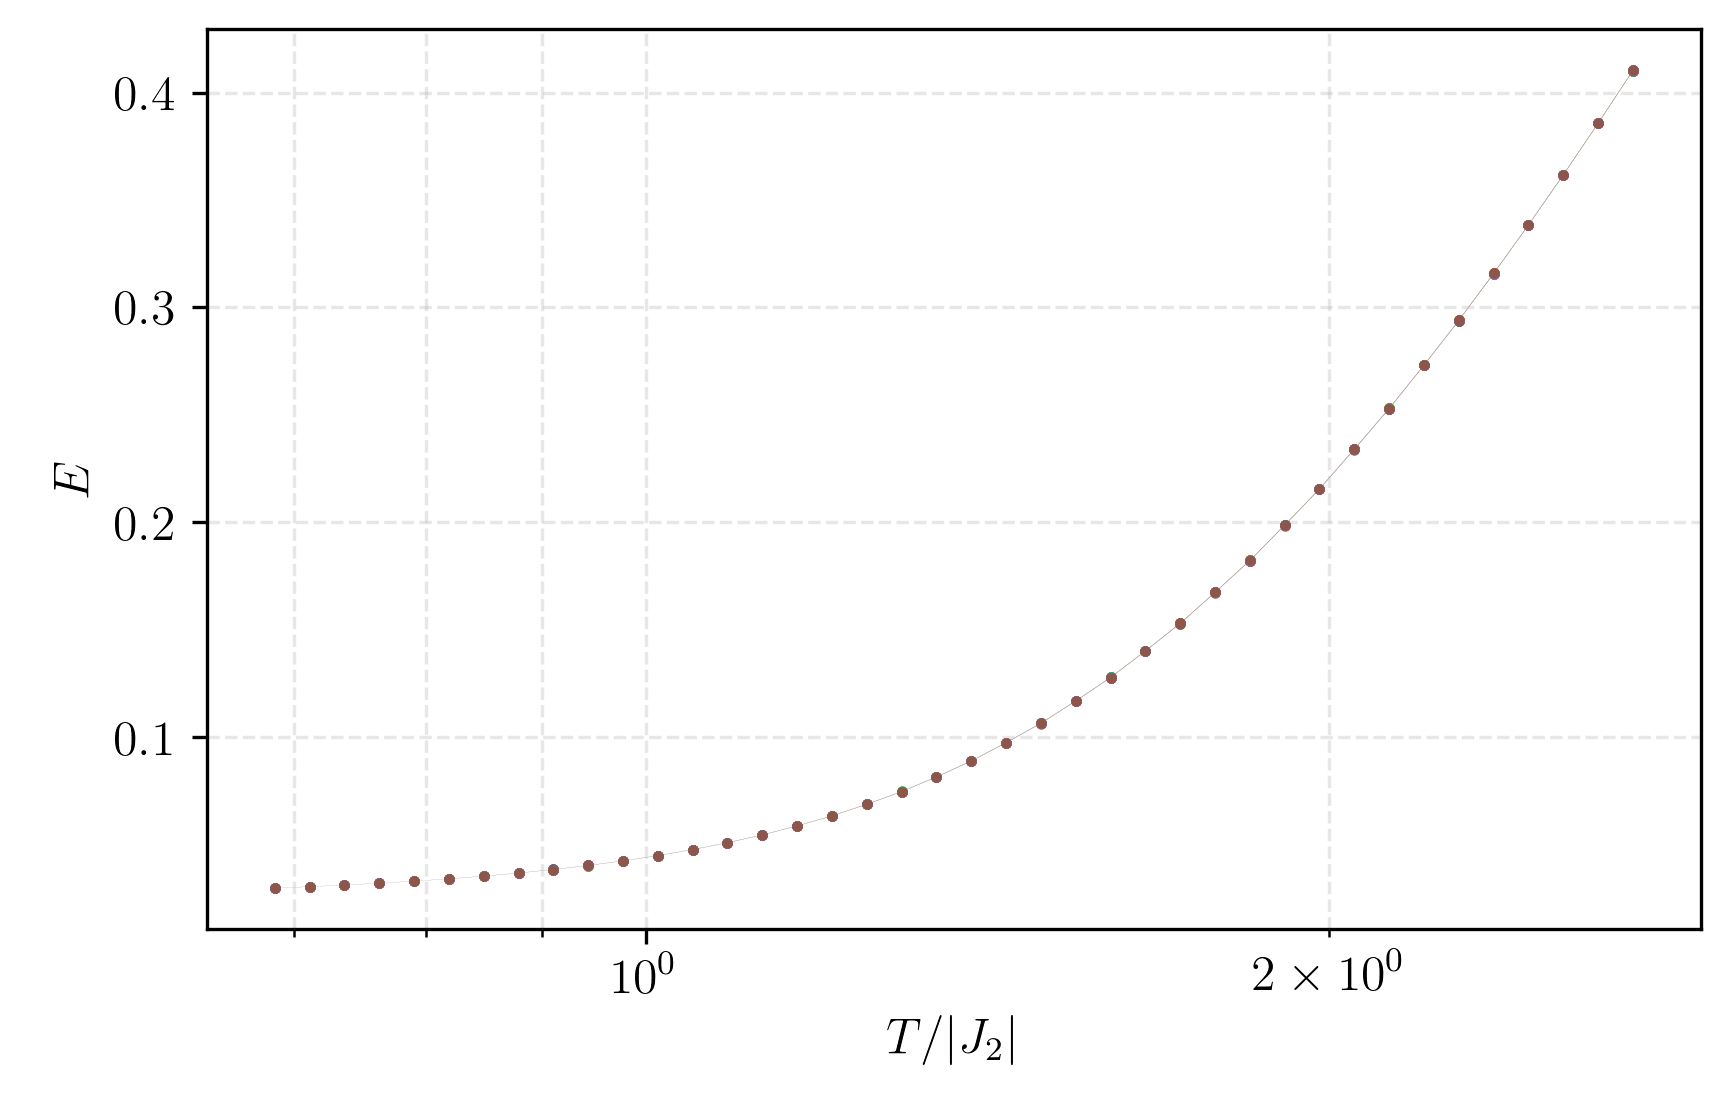

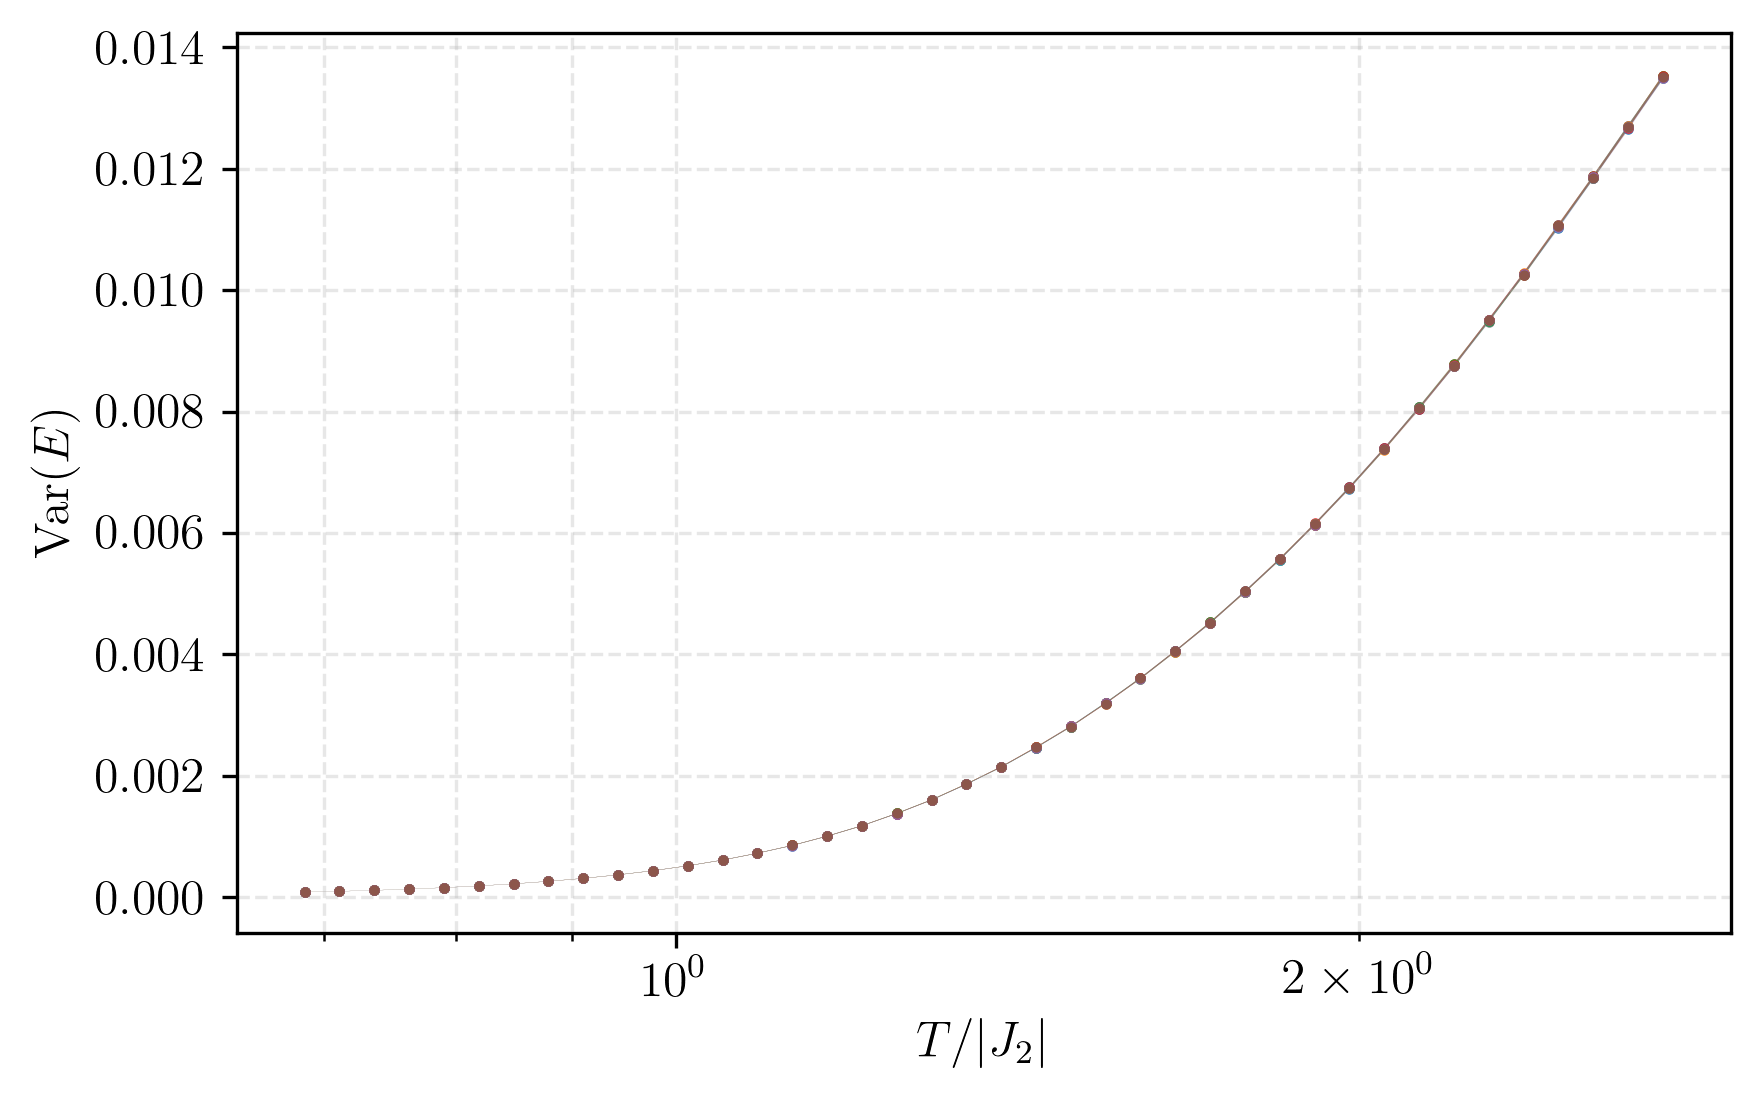

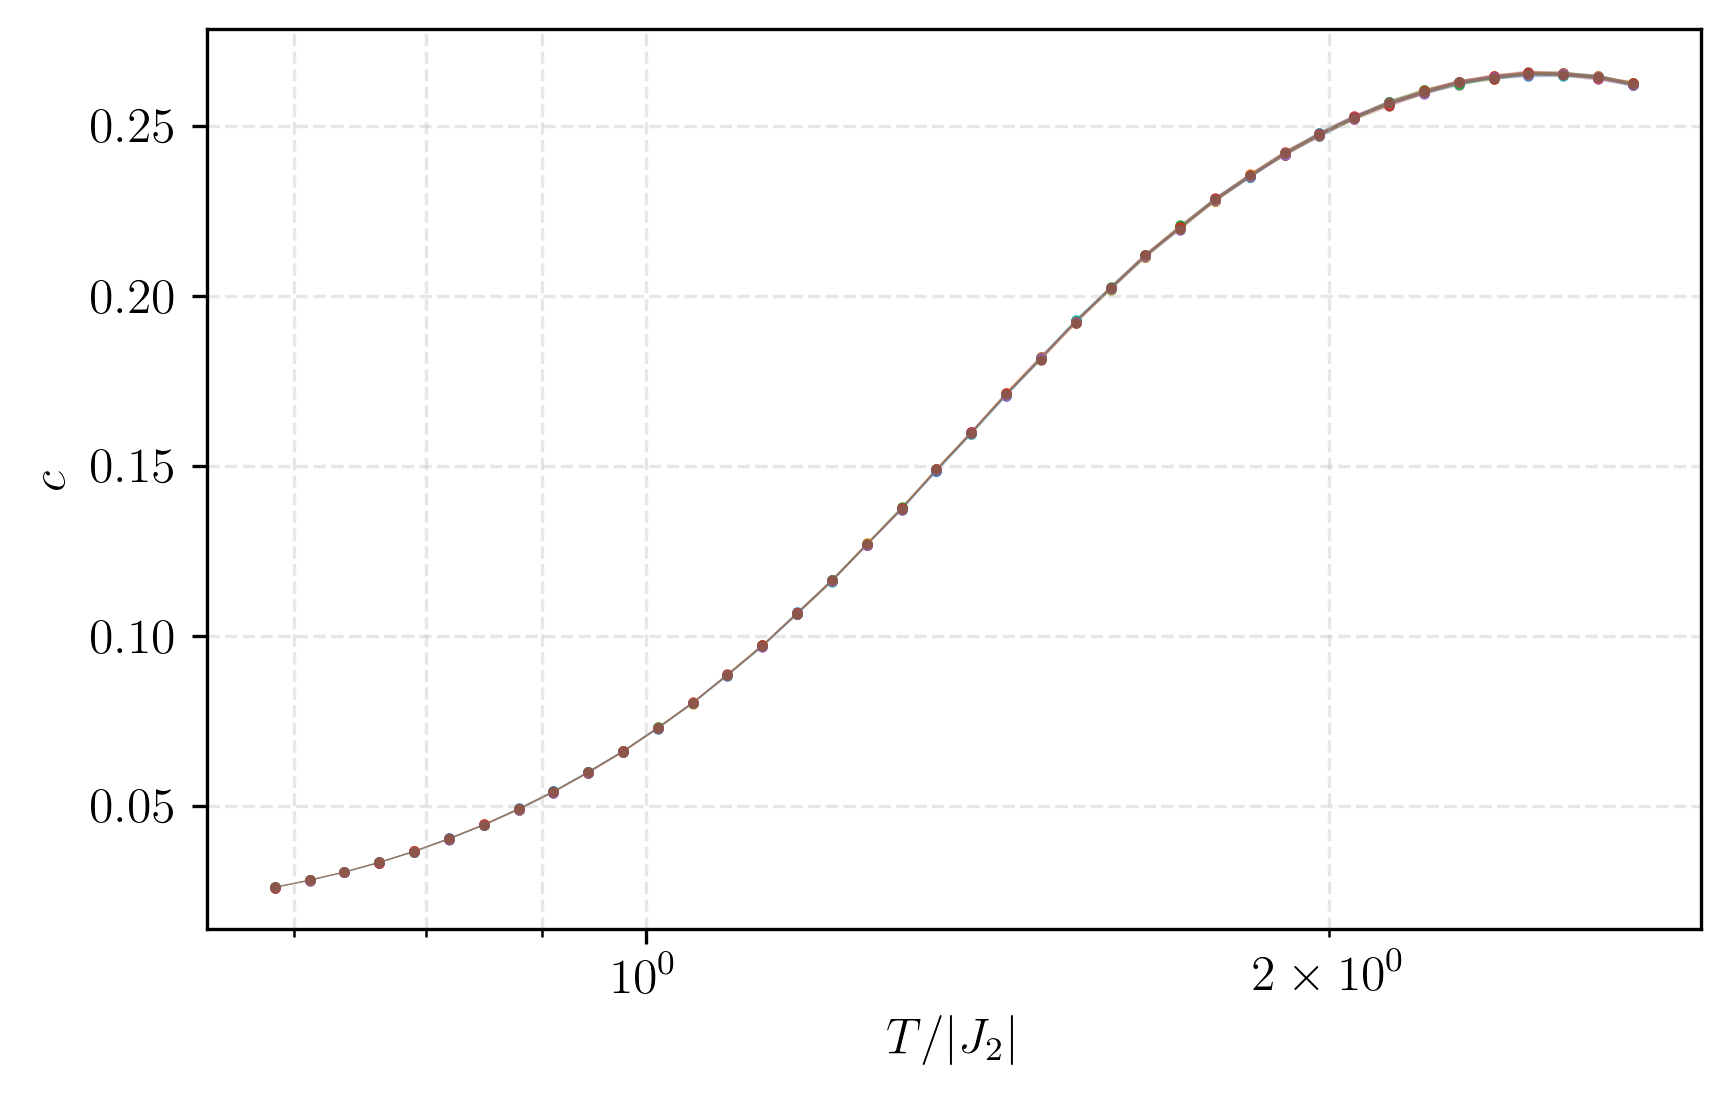

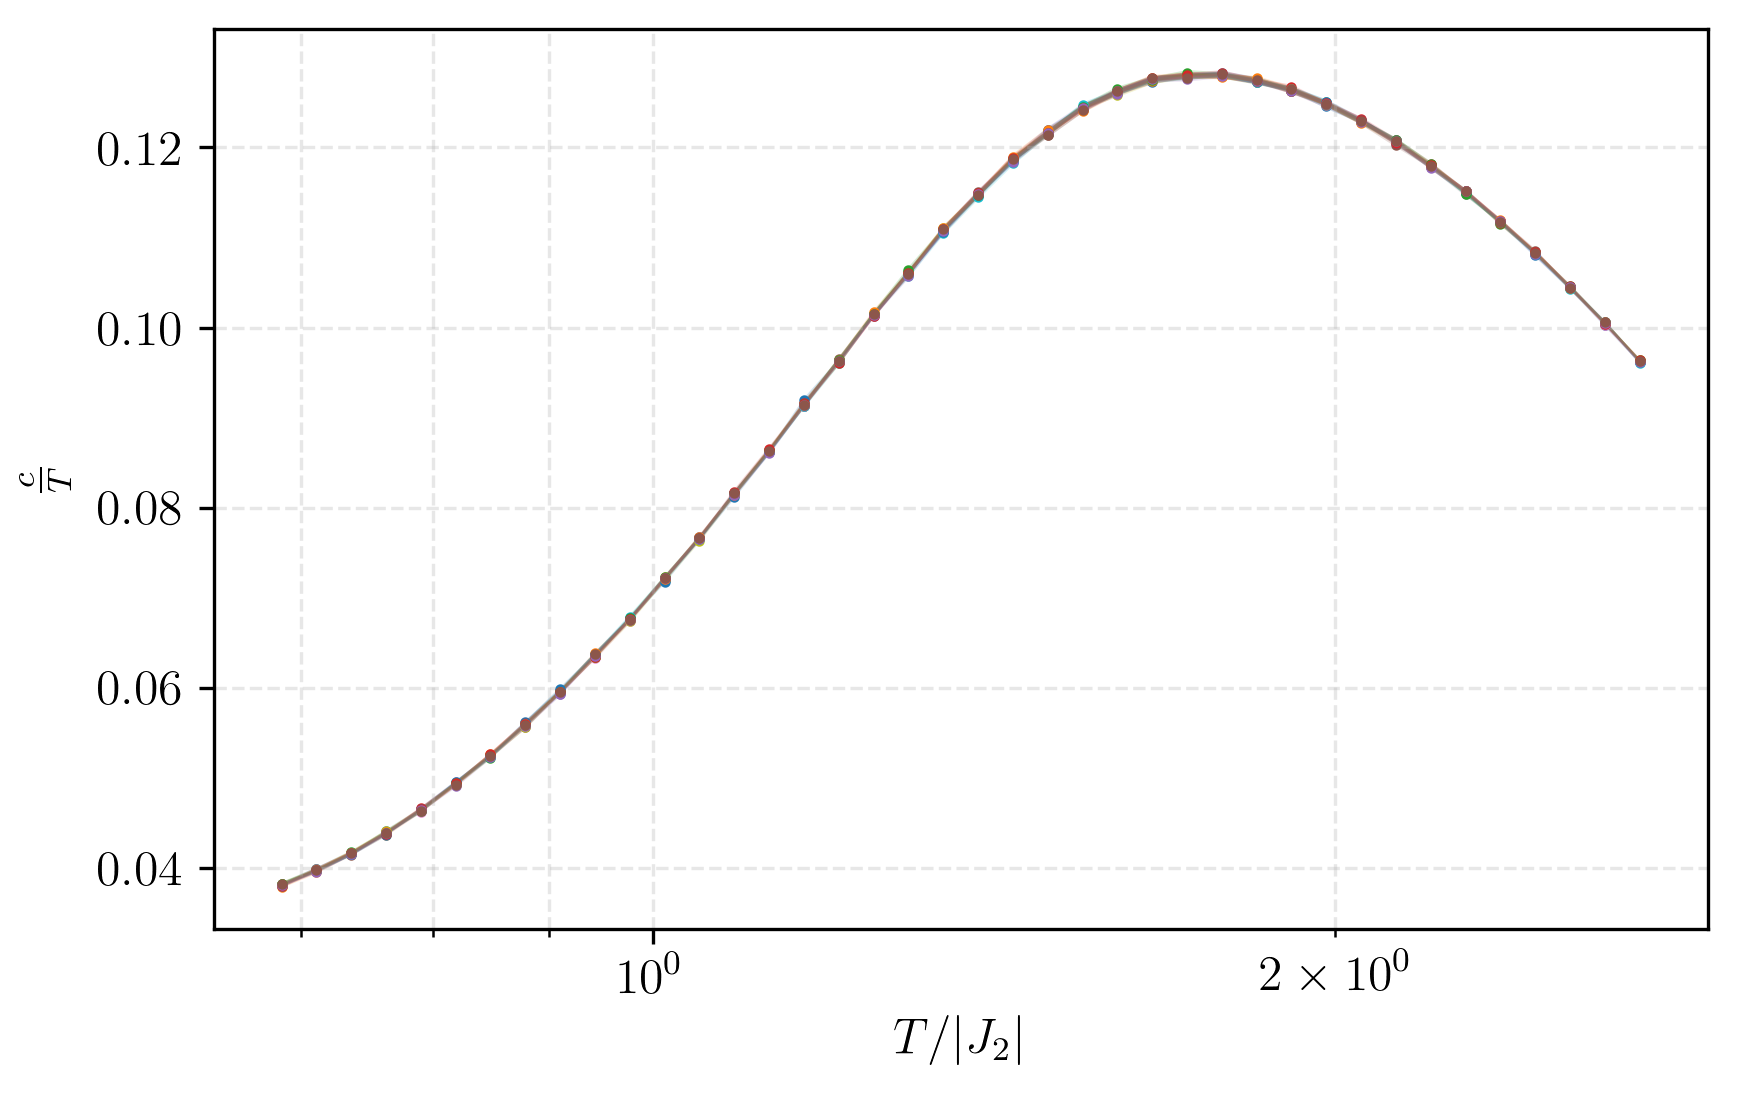

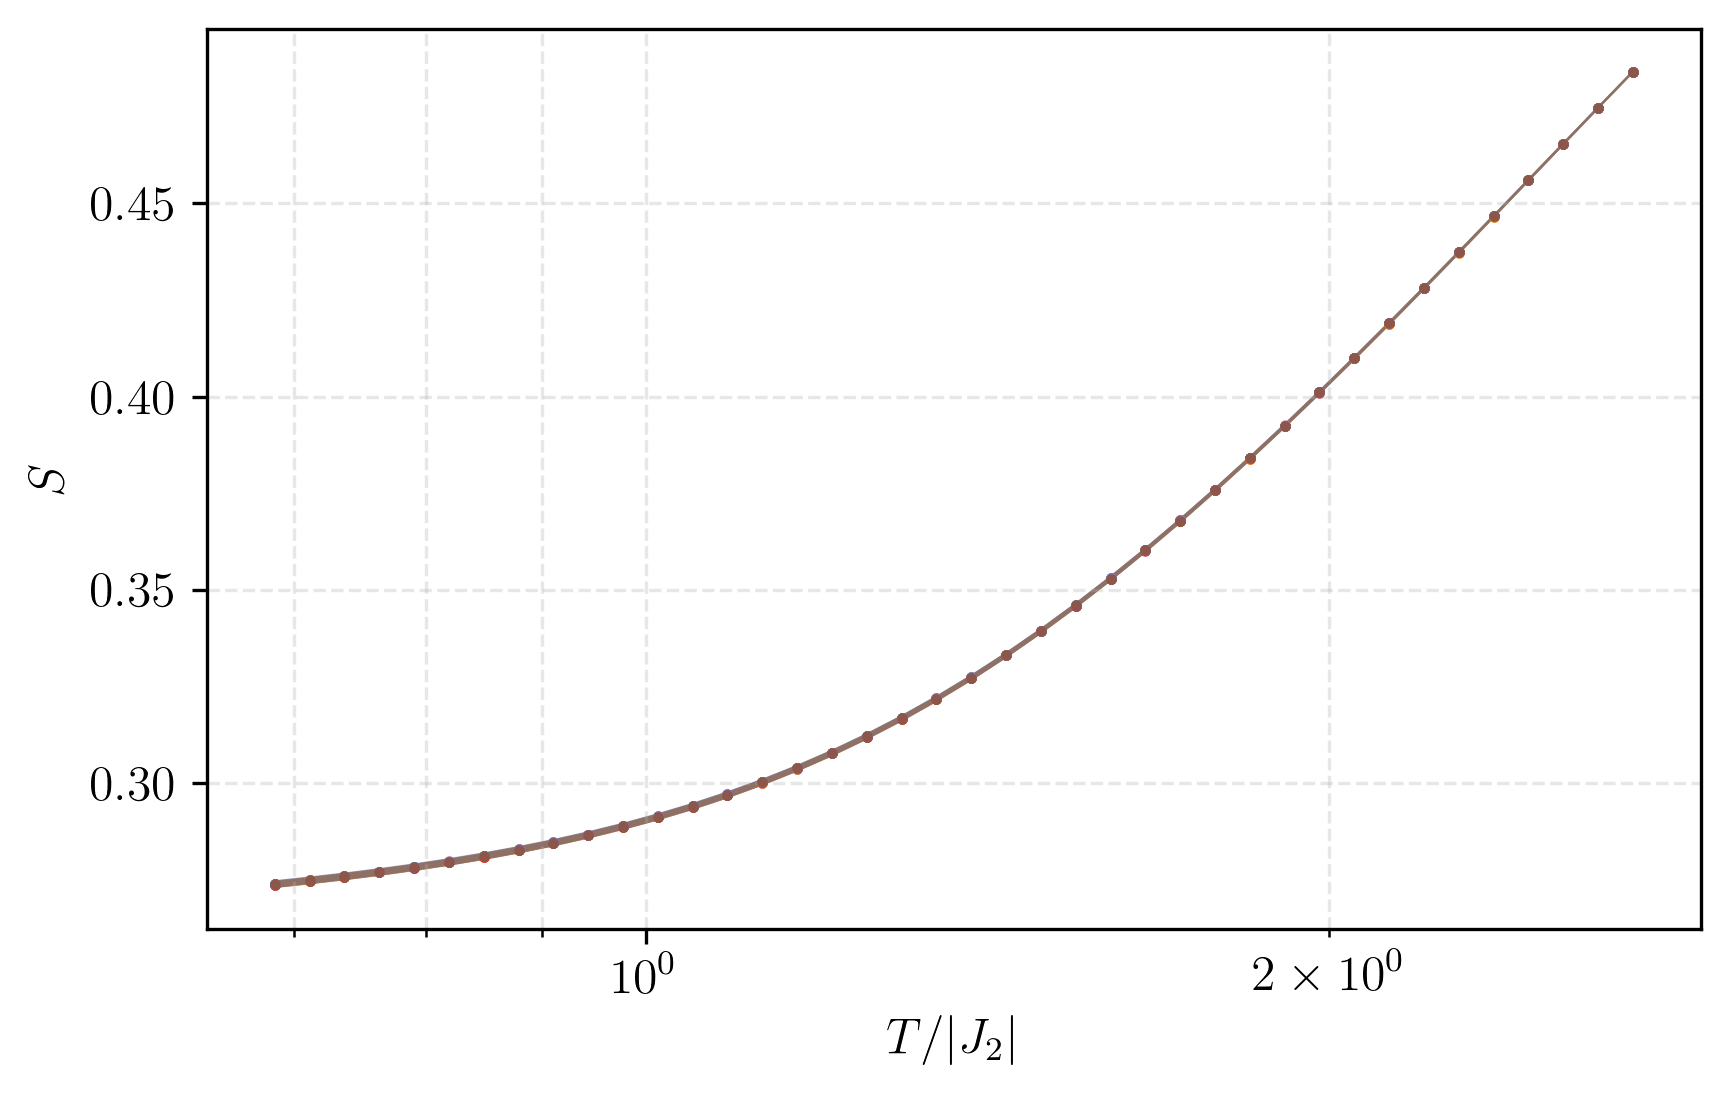

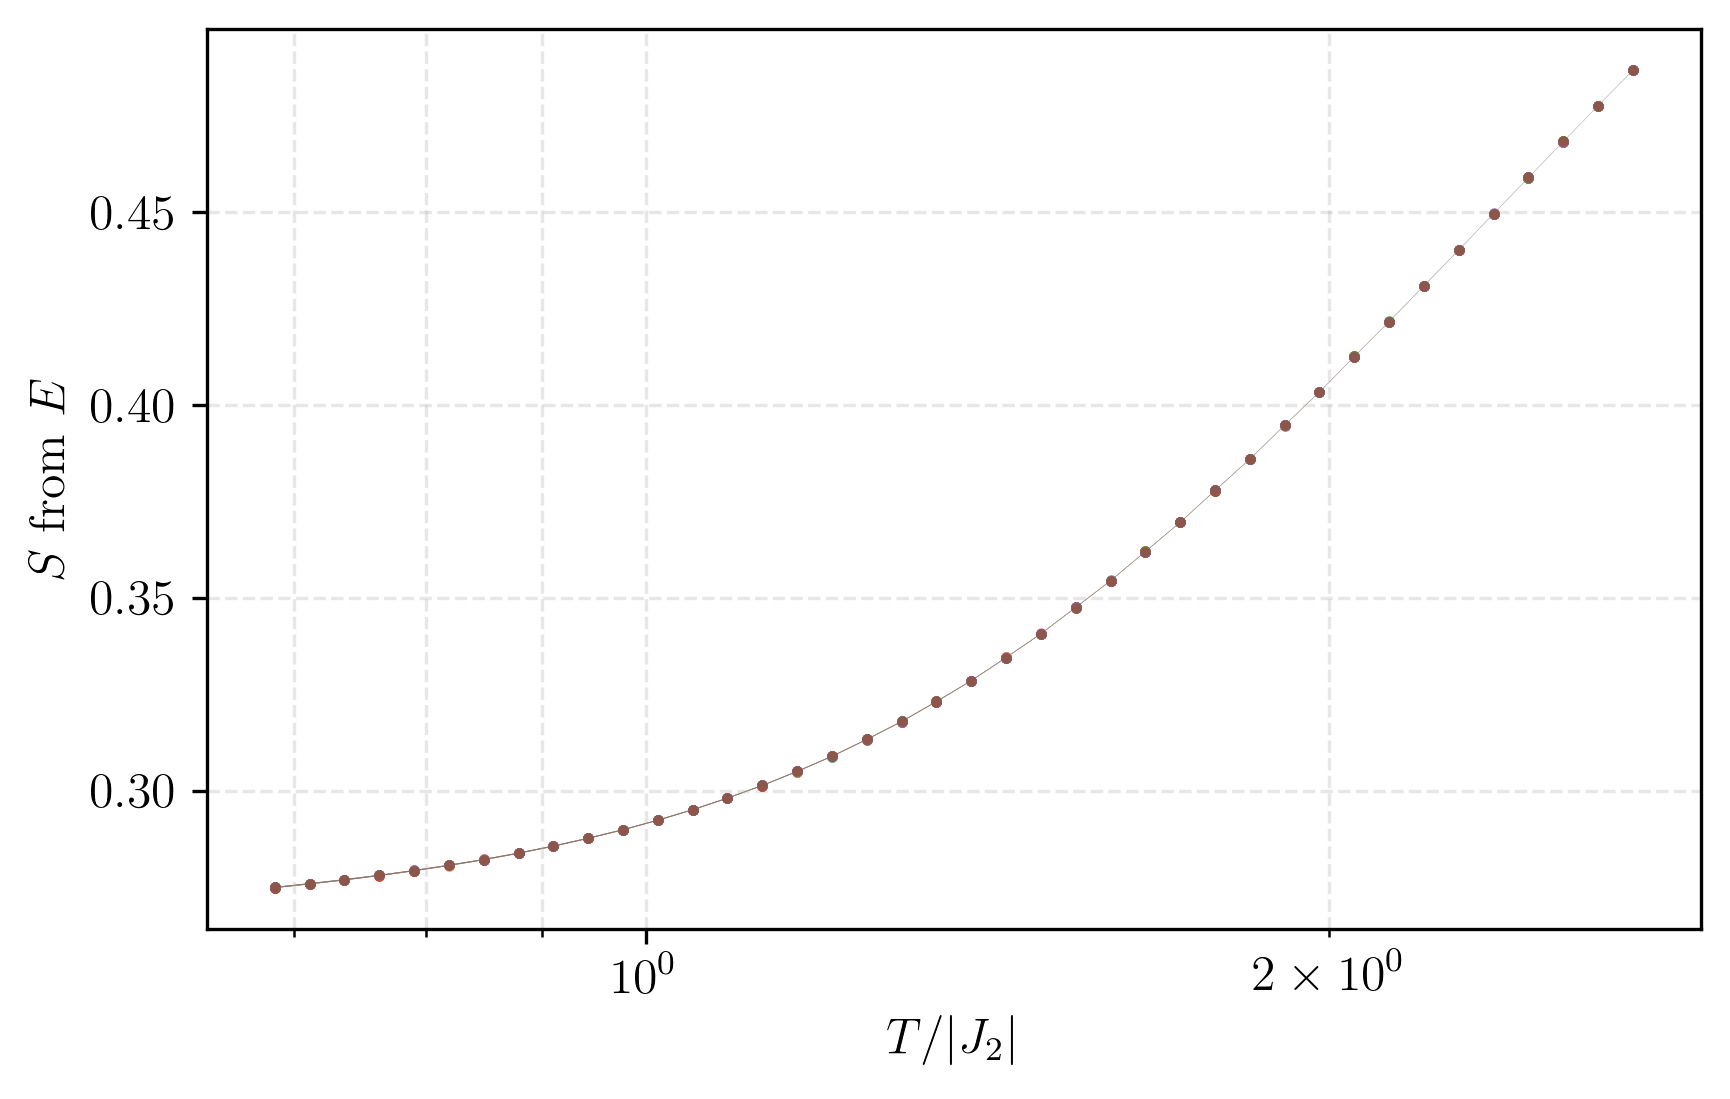

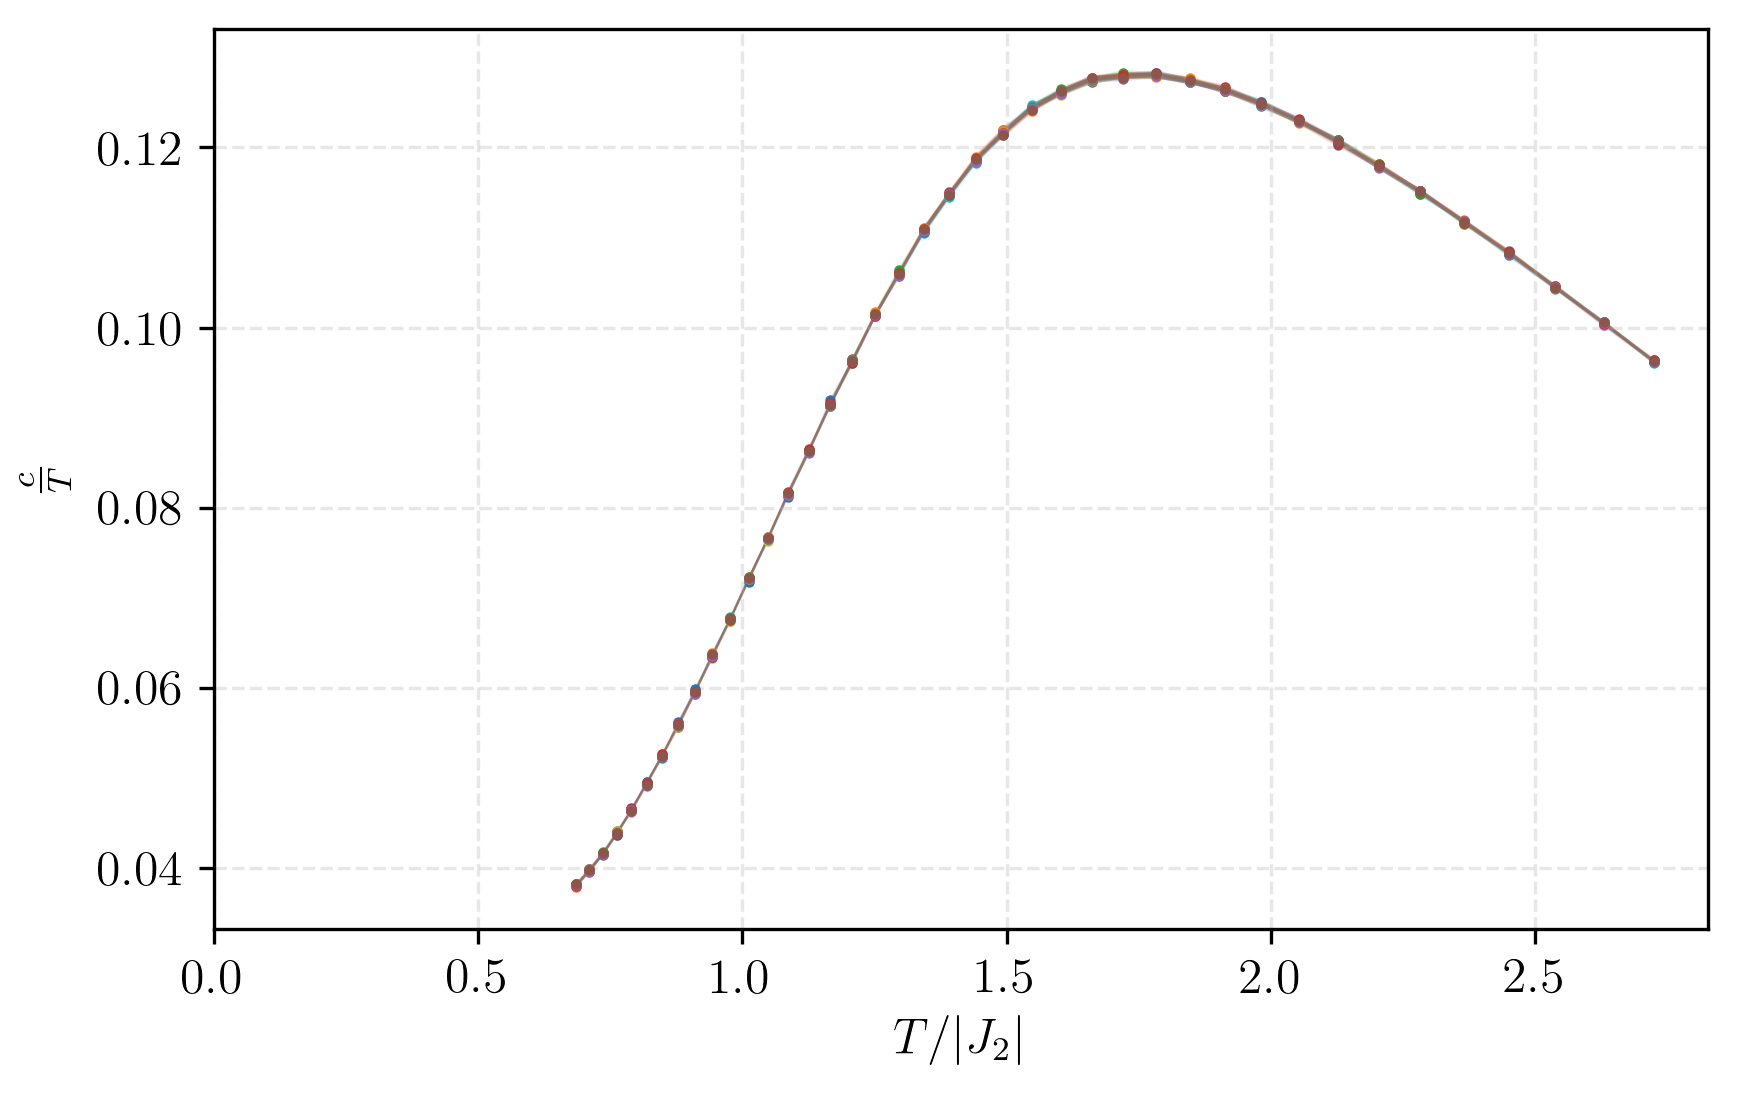

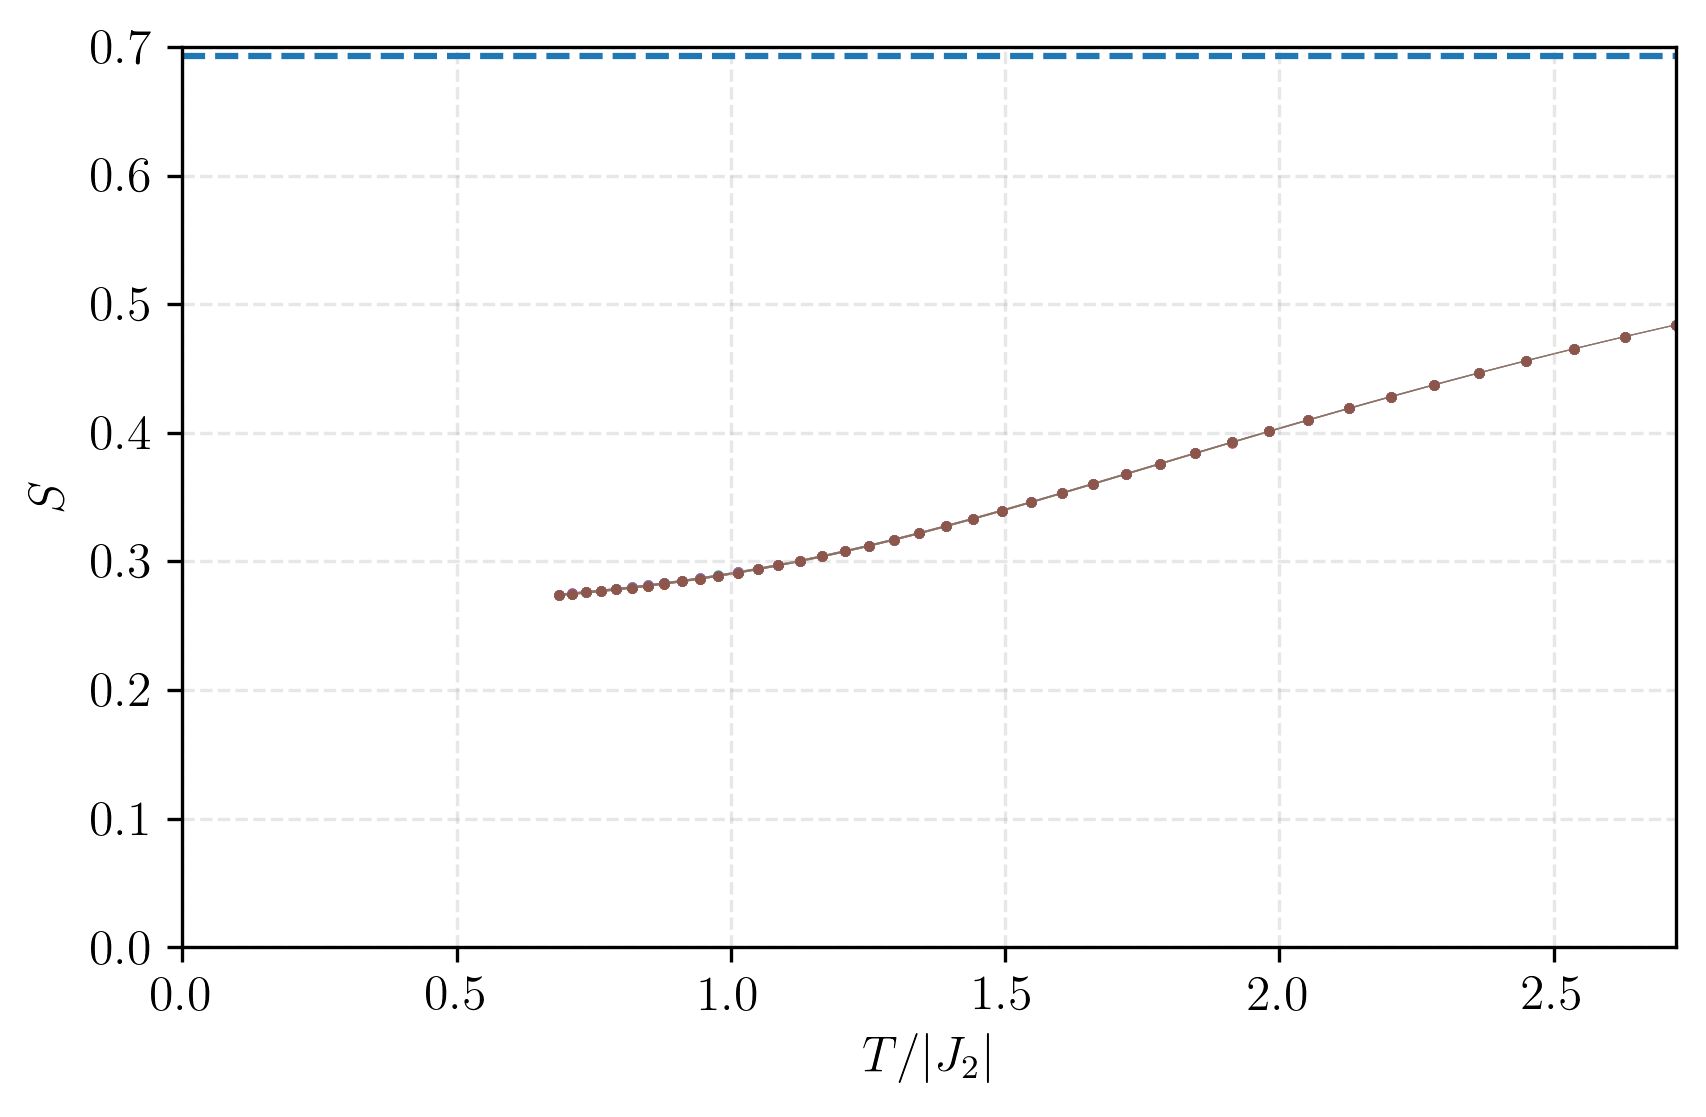

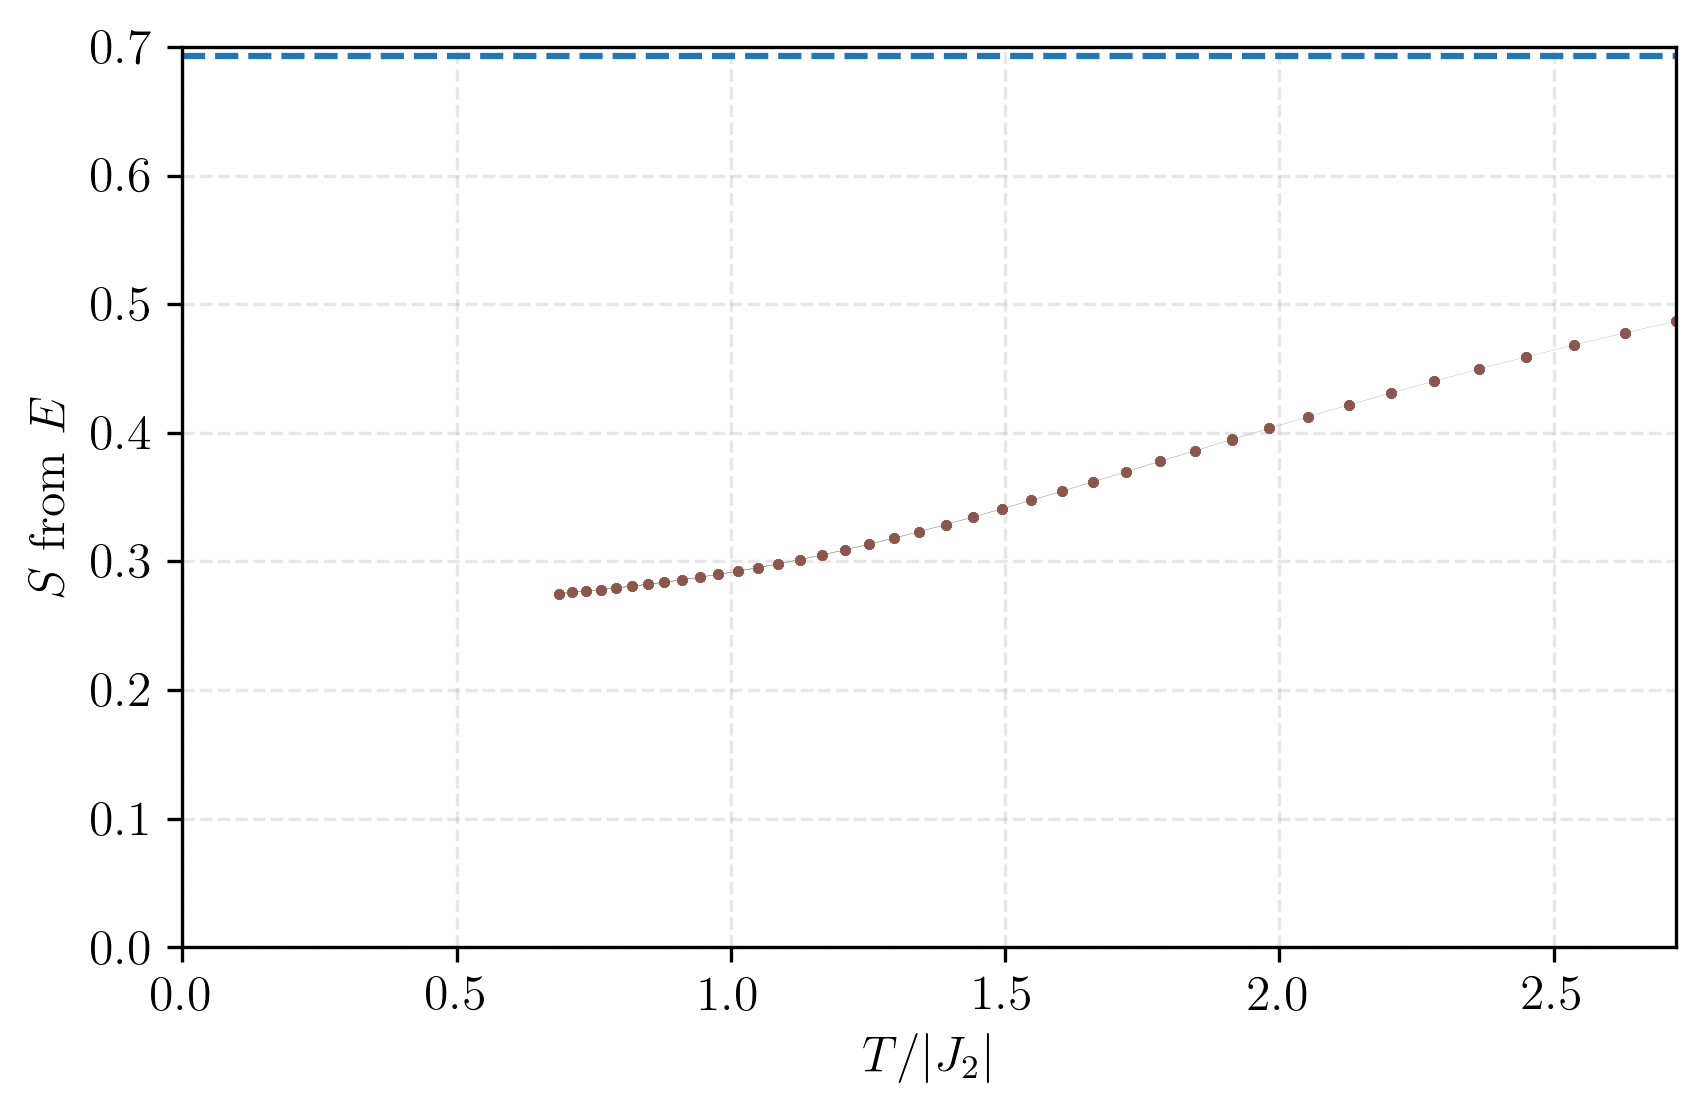

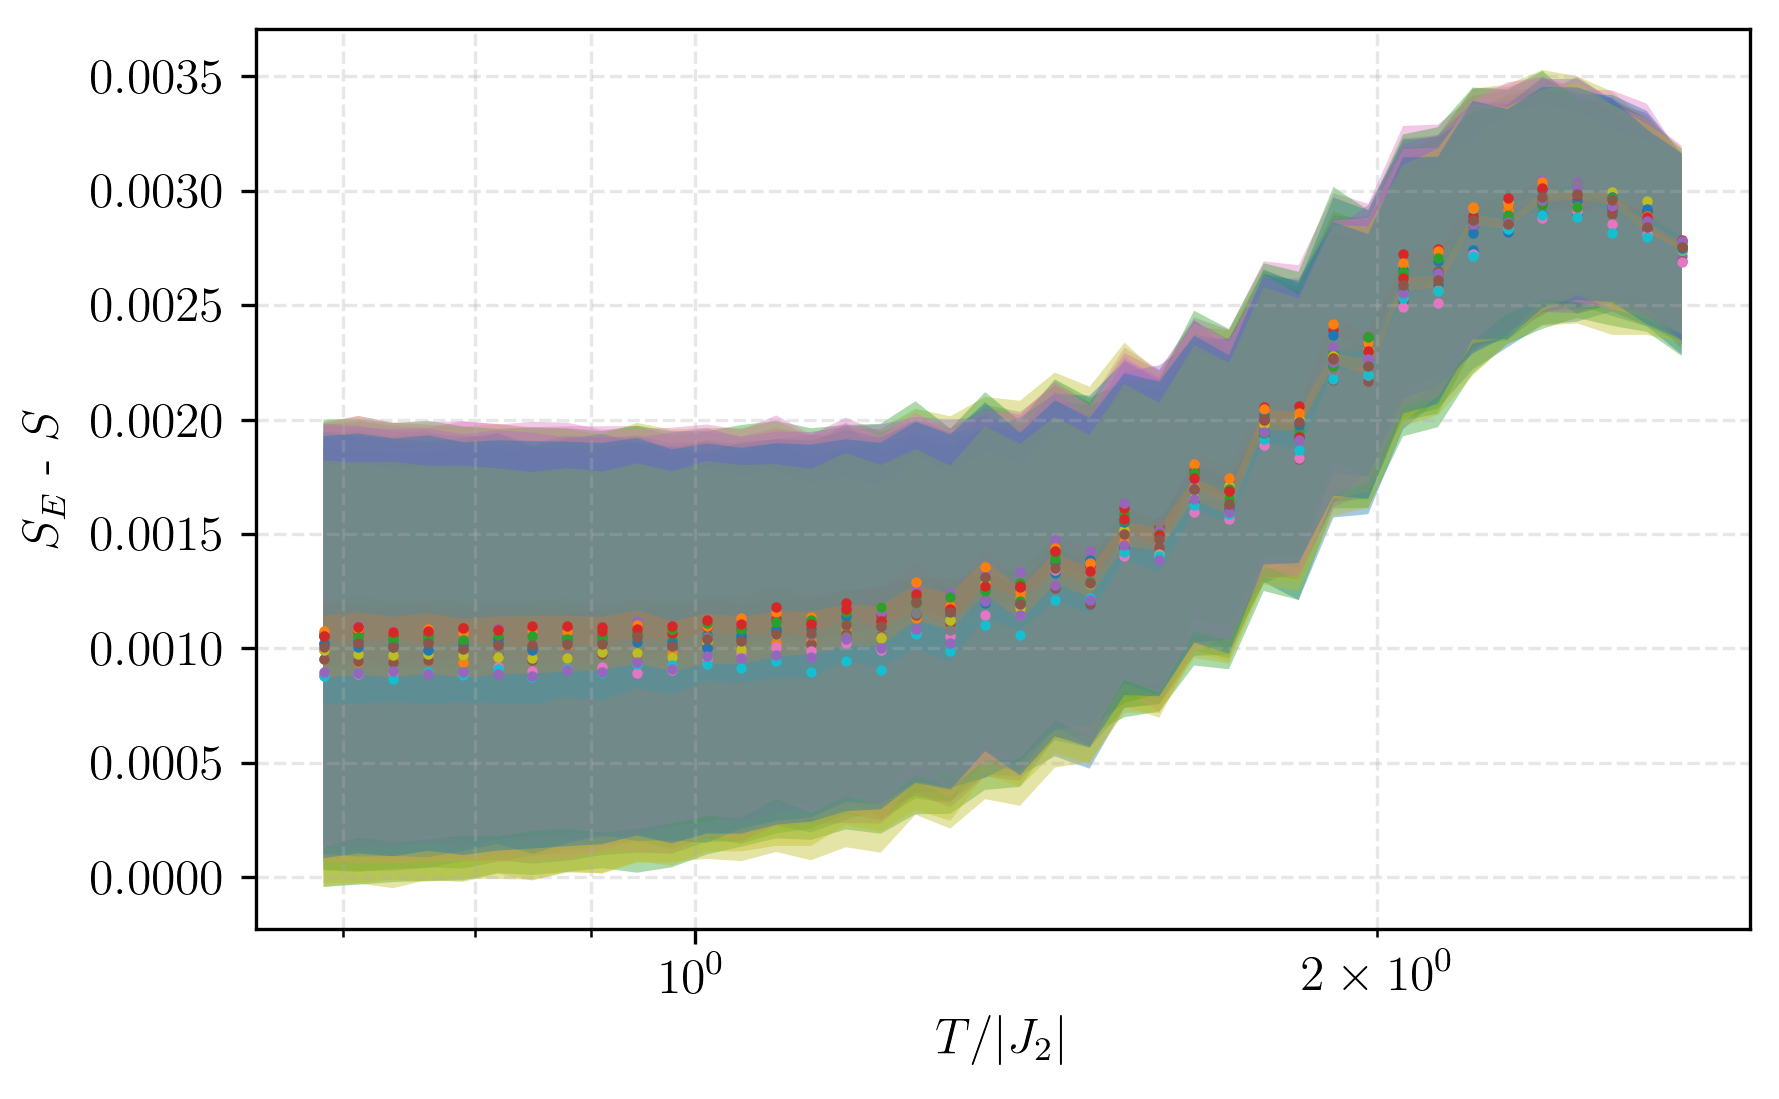

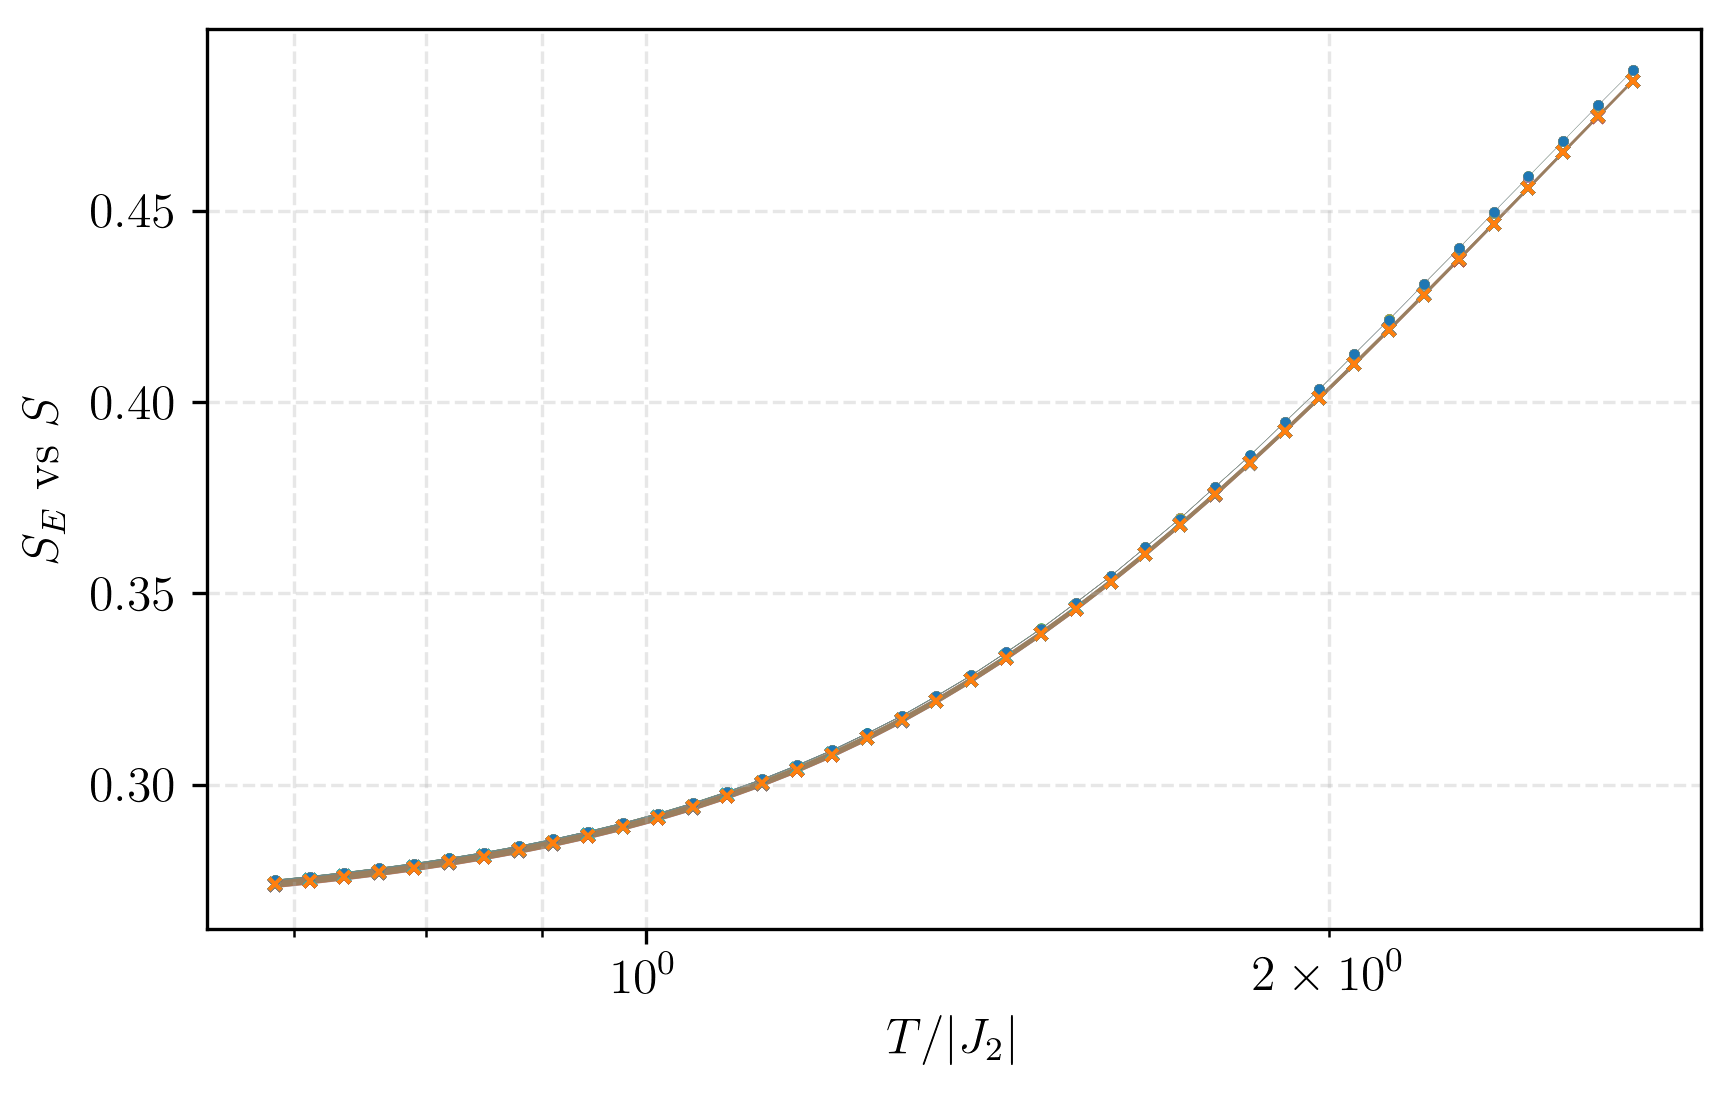

In [9]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
#for i in range(n):
#    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
#                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
#
#
if mergeruns:
    nplots = 1
    addsave = "_Merged_"
elif groupruns>1:
    nplots = n//groupruns
    addsave = "_IndependentRunsRounds_"
else:
    nplots = n
    addsave = "_IndependentRuns_"
    
tidmin = 100
tidmax = [140 for i in range(n)]
#tidmax = [len(stat_temps[i]) for i in range(n)]
put_legend = False
af.BulkPlotsE(L, nplots, 0, tidmin, tidmax, temperatures_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE-EGS, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC, J1, J2, J3, J4,
              t_h_S, t_h_Smin, t_h_Smax, t_h_SE, t_h_SEmin, t_h_SEmax,addsave = addsave,
              figsize = (6,4), markersize = 3, ncol = 2, loc = 'upper right',
              put_legend = put_legend)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


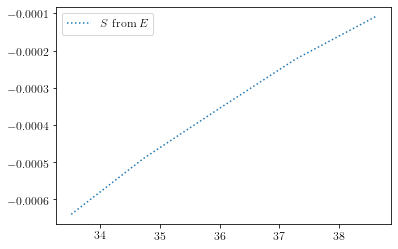

In [10]:
plt.figure()
tmax = 215
tmin = 210
t0 = 0
correction =0# -0.115*(np.array(temperatures[0])[tmin:tmax,np.newaxis]-t0)
plt.plot(temperatures[0][tmin:tmax],t_h_SE[0][tmin:tmax]-t_h_SE[0][tmax] + correction,":",label = r"$S$ from $E$")
#plt.plot(temperatures[0][tmin:tmax],t_h_S[0][tmin:tmax]-t_h_S[0][tmax]+correction, "--",label = r"$S$ from $c/T$")
plt.legend()

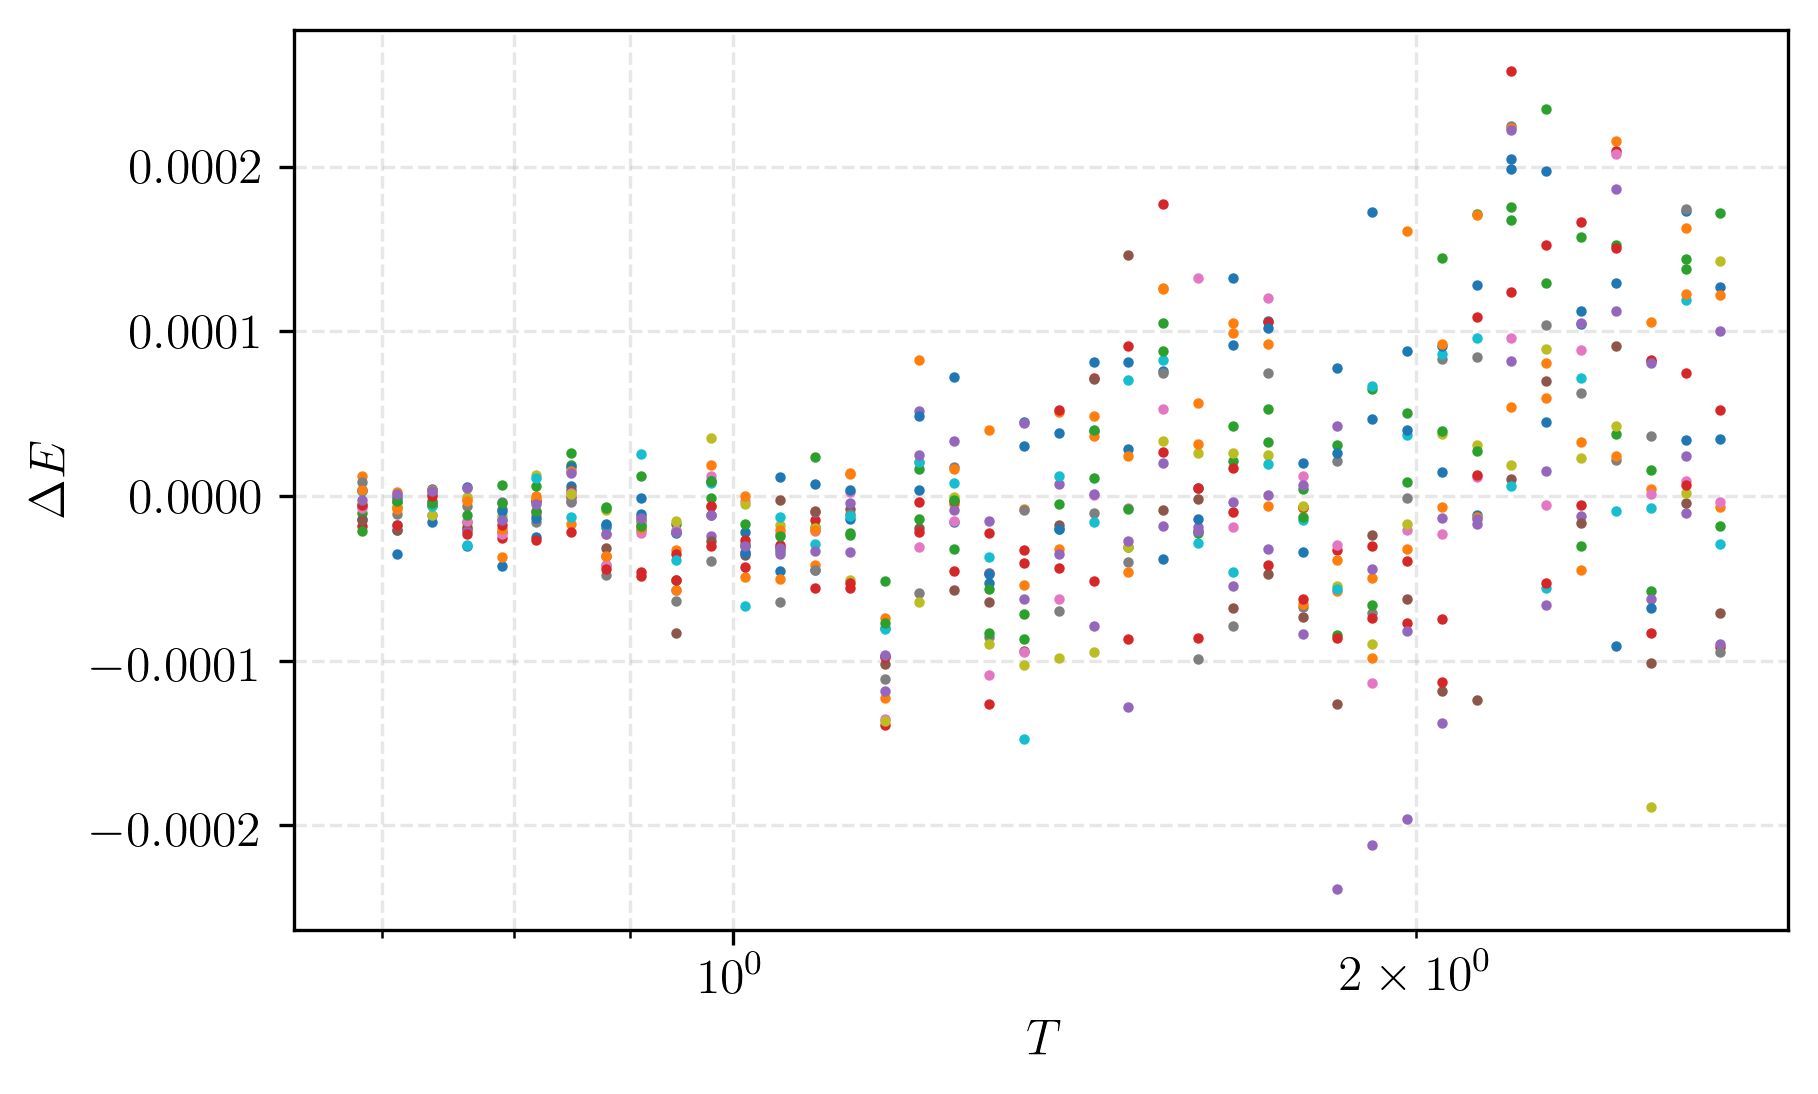

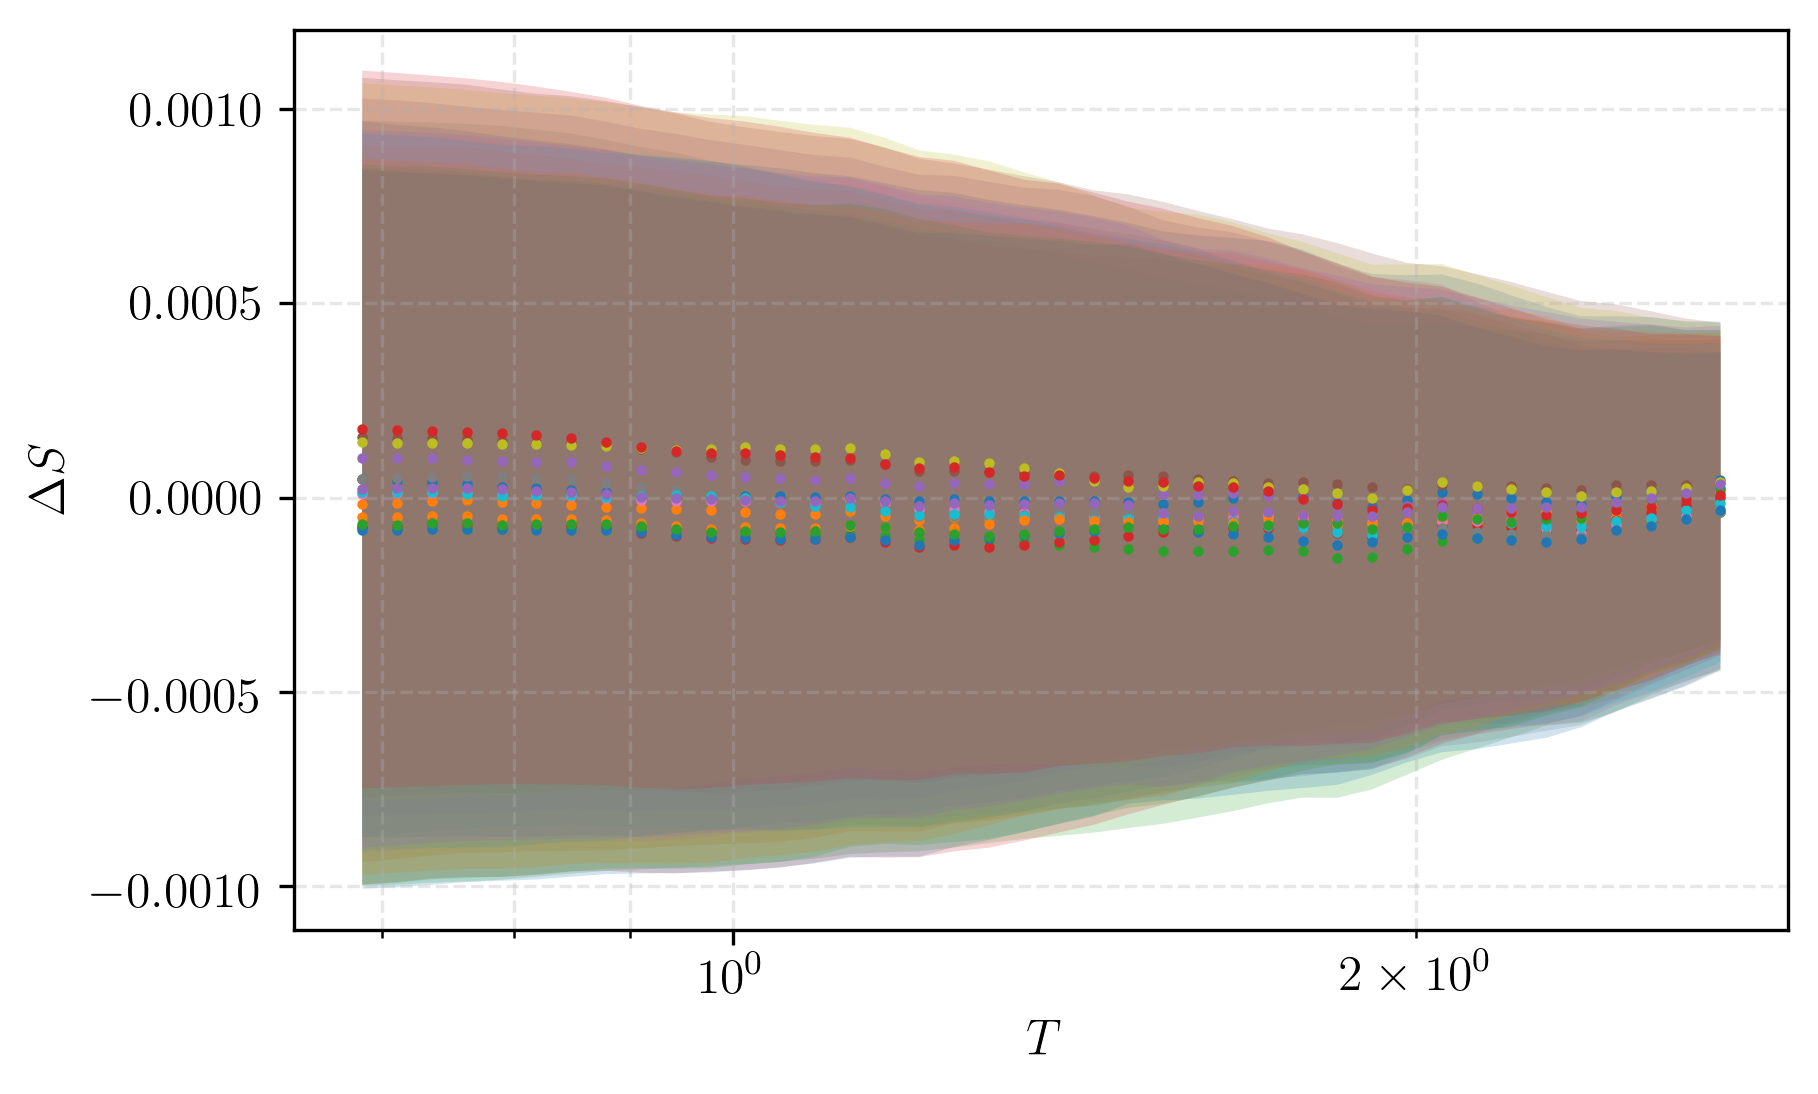

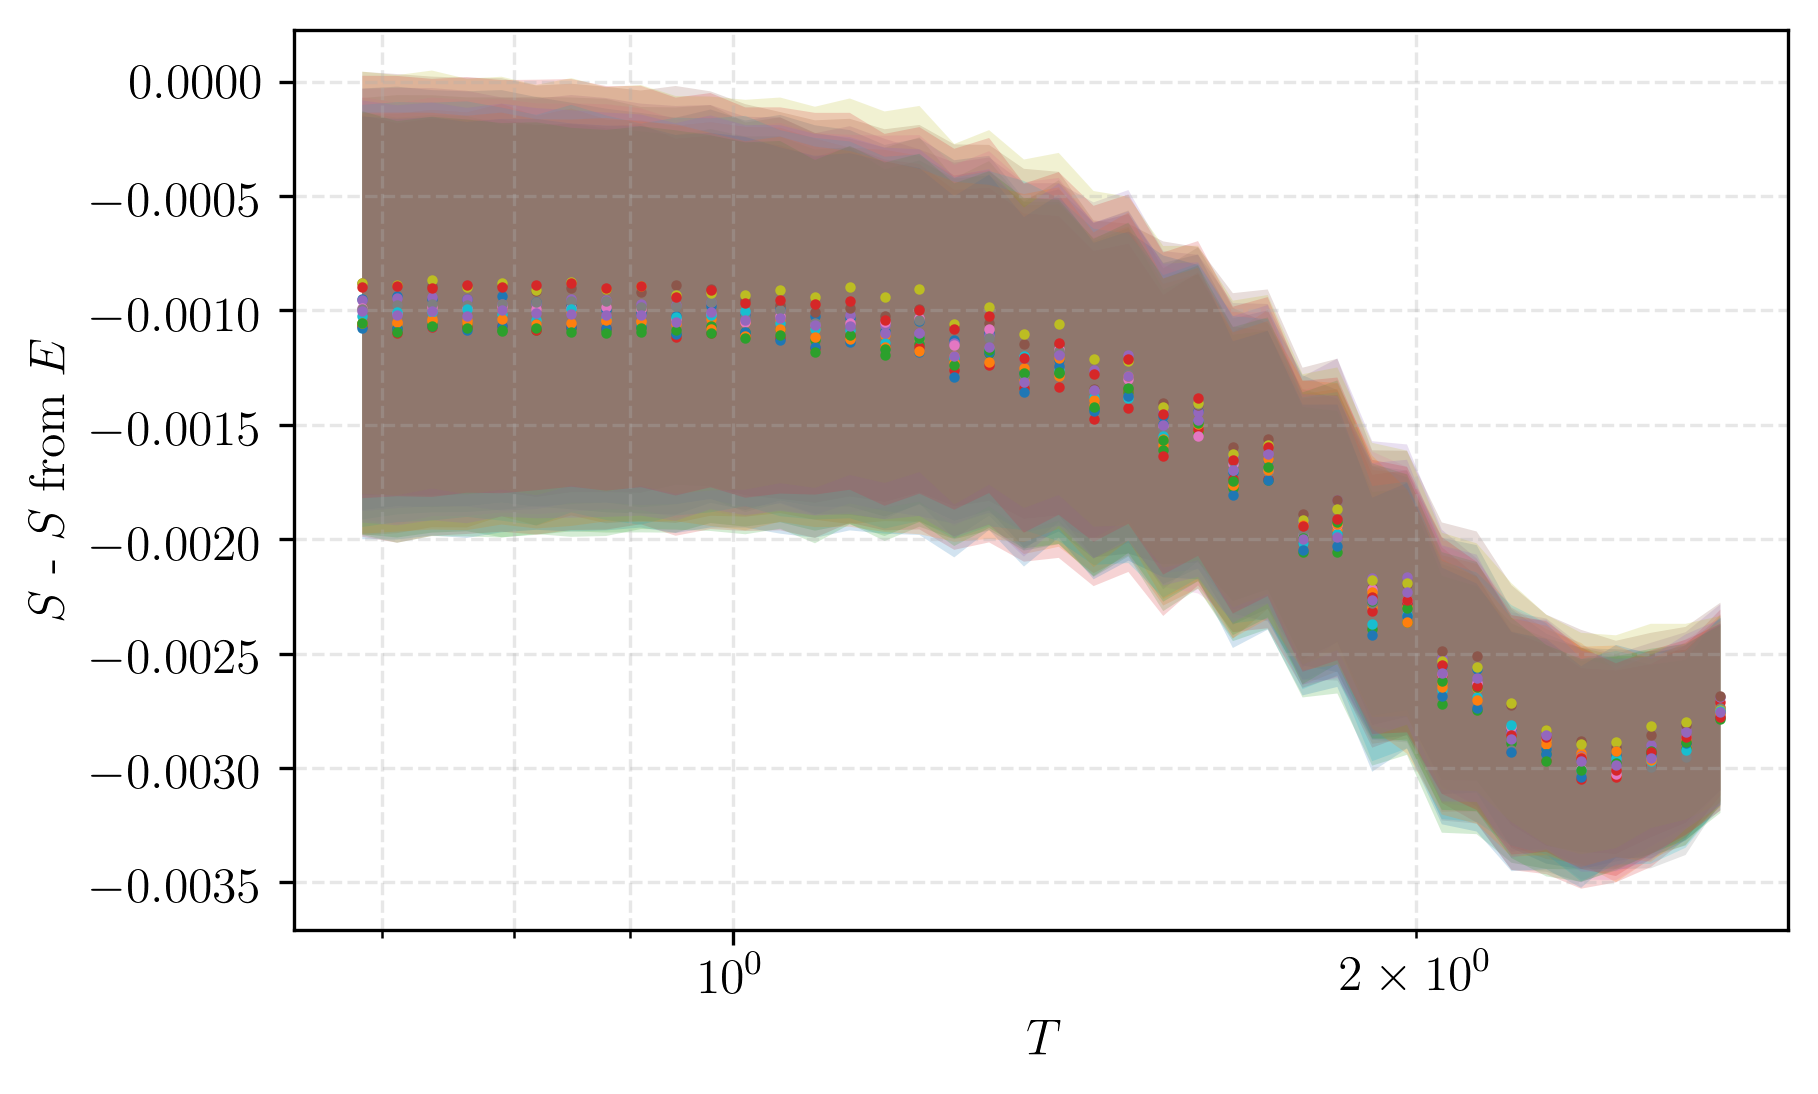

In [11]:
#if not mergeruns:
margin = [0.15, 0.15, 0.02, 0.1]
figsize = (6,4)
markersize = 3
ncol = 4
hid = 0
plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(1,nplots):
    plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                     t_h_MeanE[i][tidmin:tidmax[i]][:,hid]-t_h_MeanE[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                      label = r'$it$ = {0}'.format(i))
    #plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
    #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
    #                  - np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),
    #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
    #                  + np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),\
    #                 alpha=alpha)
plt.xlabel(r'$T$')
plt.ylabel(r'$\Delta E$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
if put_legend:
    plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.pdf')
plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.png')

margin = [0.15, 0.15, 0.02, 0.1]
figsize = (6,4)
markersize = 3
ncol = 4
hid = 0
plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(1,nplots):
    plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                     t_h_S[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                      label = r'$it$ = {0}'.format(i))
    plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
                     t_h_Smin[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],
                     t_h_Smax[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],\
                     alpha=0.2)
plt.xlabel(r'$T$')
plt.ylabel(r'$\Delta S$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
if put_legend:
    plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.pdf')
plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.png')


margin = [0.15, 0.15, 0.02, 0.1]
figsize = (6,4)
markersize = 3
ncol = 4
hid = 0
plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(1,nplots):
    plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                     t_h_S[i][tidmin:tidmax[i]][:,hid]-t_h_SE[i][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                      label = r'$it$ = {0}'.format(i))
    plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
                     t_h_Smin[i][tidmin:tidmax[i]][:,hid]-t_h_SE[i][tidmin:tidmax[0]][:,hid],
                     t_h_Smax[i][tidmin:tidmax[i]][:,hid]-t_h_SE[i][tidmin:tidmax[0]][:,hid],\
                     alpha=0.2)
plt.xlabel(r'$T$')
plt.ylabel(r'$S$ - $S$ from $E$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
if put_legend:
    plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.pdf')
plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.png')


In [12]:
print("S = %f" % Overall_t_h_S[0][0], r"+/-", "%f" % max(abs(Overall_t_h_S[0][0]-Overall_t_h_Smin[0][0]),abs(Overall_t_h_S[0][0]-Overall_t_h_Smax[0][0])))

S = 0.136877 +/- 0.000553


In [13]:
print("S = %f" % Overall_t_h_SE[0][0], r"+/-", "%f" % max(abs(Overall_t_h_SE[0][0]-Overall_t_h_SEmin[0][0]),abs(Overall_t_h_SE[0][0]-Overall_t_h_SEmax[0][0])))

S = 0.137917 +/- 0.000159


In [14]:
###################BOOTSTRAP ANALYSIS################################
################# GROUPING BY g ###############################
t_h_MeanEwork = np.array(t_h_MeanE)
t_h_MeanEsqwork = np.array(t_h_MeanEsq)
t_h_VarEwork = np.array(t_h_VarE)
Cwork = np.array(C)

g = 1

nf = 16
#Averages
Merged_t_h_MeanE= np.array([np.mean(t_h_MeanEwork[i*g:(i+1)*g], axis = 0) for i in range(nf//g)])
Merged_t_h_MeanEsq= np.array([np.mean(t_h_MeanEsqwork[i*g:(i+1)*g], axis = 0) for i in range(nf//g)])
Merged_t_h_VarE = np.array([np.mean(t_h_VarEwork[i*g:(i+1)*g], axis = 0) for i in range(nf//g)])
Merged_C = np.array([np.mean(Cwork[i*g:(i+1)*g], axis = 0) for i in range(nf//g)])

# Errors
if g != 1:
    # this below is not perfeclty accurate; might have to change it to make the results perfectly clean
    Merged_t_h_varMeanE = np.array([np.mean(np.array([(t_h_MeanE[i*g + j] - Merged_t_h_MeanE[j])**2 for j in range(g)]), axis = 0) for i in range(nf)])
    Merged_t_h_varMeanEsq = np.array([np.mean(np.array([(t_h_MeanEsq[i*g + j] - Merged_t_h_MeanEsq[j])**2 for j in range(g)]), axis = 0) for i in range(nf)])
    Merged_t_h_ErrVarE = np.array([np.mean(np.array([(t_h_VarEwork[i*g + j] - Merged_t_h_VarE[j])**2 for j in range(g)]), axis = 0) for i in range(nf)])
    Merged_ErrC = np.array([np.mean(np.array([(Cwork[i*g + j] - Merged_C[j])**2 for j in range(g)]), axis = 0) for i in range(nf)])
else:
    Merged_t_h_varMeanE = np.array(t_h_varMeanE)
    Merged_t_h_varMeanEsq = np.array(t_h_varMeanEsq)
    Merged_t_h_ErrVarE = np.array(t_h_ErrVarE)
    Merged_ErrC = np.array(ErrC)


In [15]:
# last one is all of the runs
boot = np.vstack((np.random.choice(nf, size = (nf-2, nf)), np.arange(nf)))

boot_t_h_MeanE = np.vstack((np.array([np.mean(Merged_t_h_MeanE[boot[i]], axis = 0) for i in range(nf-1)]),np.array(Overall_t_h_MeanE)))
boot_t_h_MeanEsq = np.vstack((np.array([np.mean(Merged_t_h_MeanEsq[boot[i]], axis = 0) for i in range(nf-1)]),np.array(Overall_t_h_MeanEsq)))
boot_t_h_VarE = np.vstack((np.array([np.mean(Merged_t_h_VarE[boot[i]], axis = 0) for i in range(nf-1)]),np.array(Overall_t_h_VarE)))
boot_C = np.vstack((np.array([np.mean(Merged_C[boot[i]], axis = 0) for i in range(nf-1)]),np.array(Overall_C)))

# Recompute errors
boot_t_h_varMeanE = np.vstack((np.array([np.var(Merged_t_h_MeanE[boot[i]], axis = 0)/(nf-1) for i in range(nf-1)]),np.array(Overall_t_h_varMeanE)))
boot_t_h_varMeanEsq = np.vstack((np.array([np.var(Merged_t_h_MeanEsq[boot[i]], axis = 0)/(nf-1) for i in range(nf-1)]),np.array(Overall_t_h_varMeanEsq)))

boot_ErrC = np.vstack((np.array([np.std(Merged_C[boot[i]], axis = 0)/np.sqrt(nf-1) for i in range(nf-1)]),np.array(Overall_ErrC)))
boot_t_h_ErrVarE = np.vstack((np.array([np.std(Merged_t_h_ErrVarE[boot[i]], axis = 0)/np.sqrt(nf-1) for i in range(nf-1)]),np.array(Overall_t_h_ErrVarE)))

[boot_t_h_S, boot_t_h_Smin, boot_t_h_Smax] = [[[] for _ in range(nf)],[[] for _ in range(nf)],[[] for _ in range(nf)]]
for i in range(nf):
    [boot_t_h_S[i], boot_t_h_Smin[i], boot_t_h_Smax[i]] =\
    af.ComputeEntropy(boot_C[i], boot_ErrC[i], temperatures[0], stat_hfields[0], nt[0], nh[0],**kw)
    
[boot_t_h_SE, boot_t_h_SEmin, boot_t_h_SEmax] = [[[] for _ in range(nf)],[[] for _ in range(nf)],[[] for _ in range(nf)]]

EGS =2/3*np.array(J1)-2/3*np.array(J2)-np.array(J3)
    
for i in range(nf):
    [boot_t_h_SE[i], boot_t_h_SEmin[i], boot_t_h_SEmax[i]] =\
    af.ComputeEntropyFromE(boot_t_h_MeanE[i], boot_t_h_varMeanE[i], temperatures[0], 
                           stat_hfields[0], nt[0], nh[0],EGS = EGS[0], **kw )


CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)
CE: CoverT shape  (216, 1)


In [16]:
print(boot_t_h_Smin[-2][0:5])
print(boot_t_h_S[-2][0:5])
print(boot_t_h_Smax[-2][0:5])

[[0.13660102]
 [0.13660102]
 [0.13660102]
 [0.13660102]
 [0.13660102]]
[[0.13687729]
 [0.13687729]
 [0.13687729]
 [0.13687729]
 [0.13687729]]
[[0.13715356]
 [0.13715356]
 [0.13715356]
 [0.13715356]
 [0.13715356]]


In [17]:
print(Overall_t_h_Smin[0][0:5])
print(Overall_t_h_S[0][0:5])
print(Overall_t_h_Smax[0][0:5])

[[0.13632476]
 [0.13632476]
 [0.13632476]
 [0.13632476]
 [0.13632476]]
[[0.13687729]
 [0.13687729]
 [0.13687729]
 [0.13687729]
 [0.13687729]]
[[0.13742983]
 [0.13742983]
 [0.13742983]
 [0.13742983]
 [0.13742982]]


In [18]:
print(Overall_t_h_SEmin[0][0:5])
print(Overall_t_h_SE[0][0:5])
print(Overall_t_h_SEmax[0][0:5])

[[0.13775786]
 [0.1377579 ]
 [0.13775788]
 [0.13775797]
 [0.137758  ]]
[[0.13791704]
 [0.13791706]
 [0.13791704]
 [0.1379171 ]
 [0.13791714]]
[[0.13807621]
 [0.13807621]
 [0.13807621]
 [0.13807624]
 [0.13807628]]


In [19]:
print(boot_t_h_SEmin[0][0:5])
print(boot_t_h_SE[0][0:5])
print(boot_t_h_SEmax[0][0:5])

[[0.13774661]
 [0.13774667]
 [0.13774661]
 [0.13774668]
 [0.13774676]]
[[0.13788925]
 [0.13788929]
 [0.13788925]
 [0.13788929]
 [0.13788937]]
[[0.13803188]
 [0.13803192]
 [0.13803189]
 [0.13803189]
 [0.13803199]]


In [20]:
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '_']


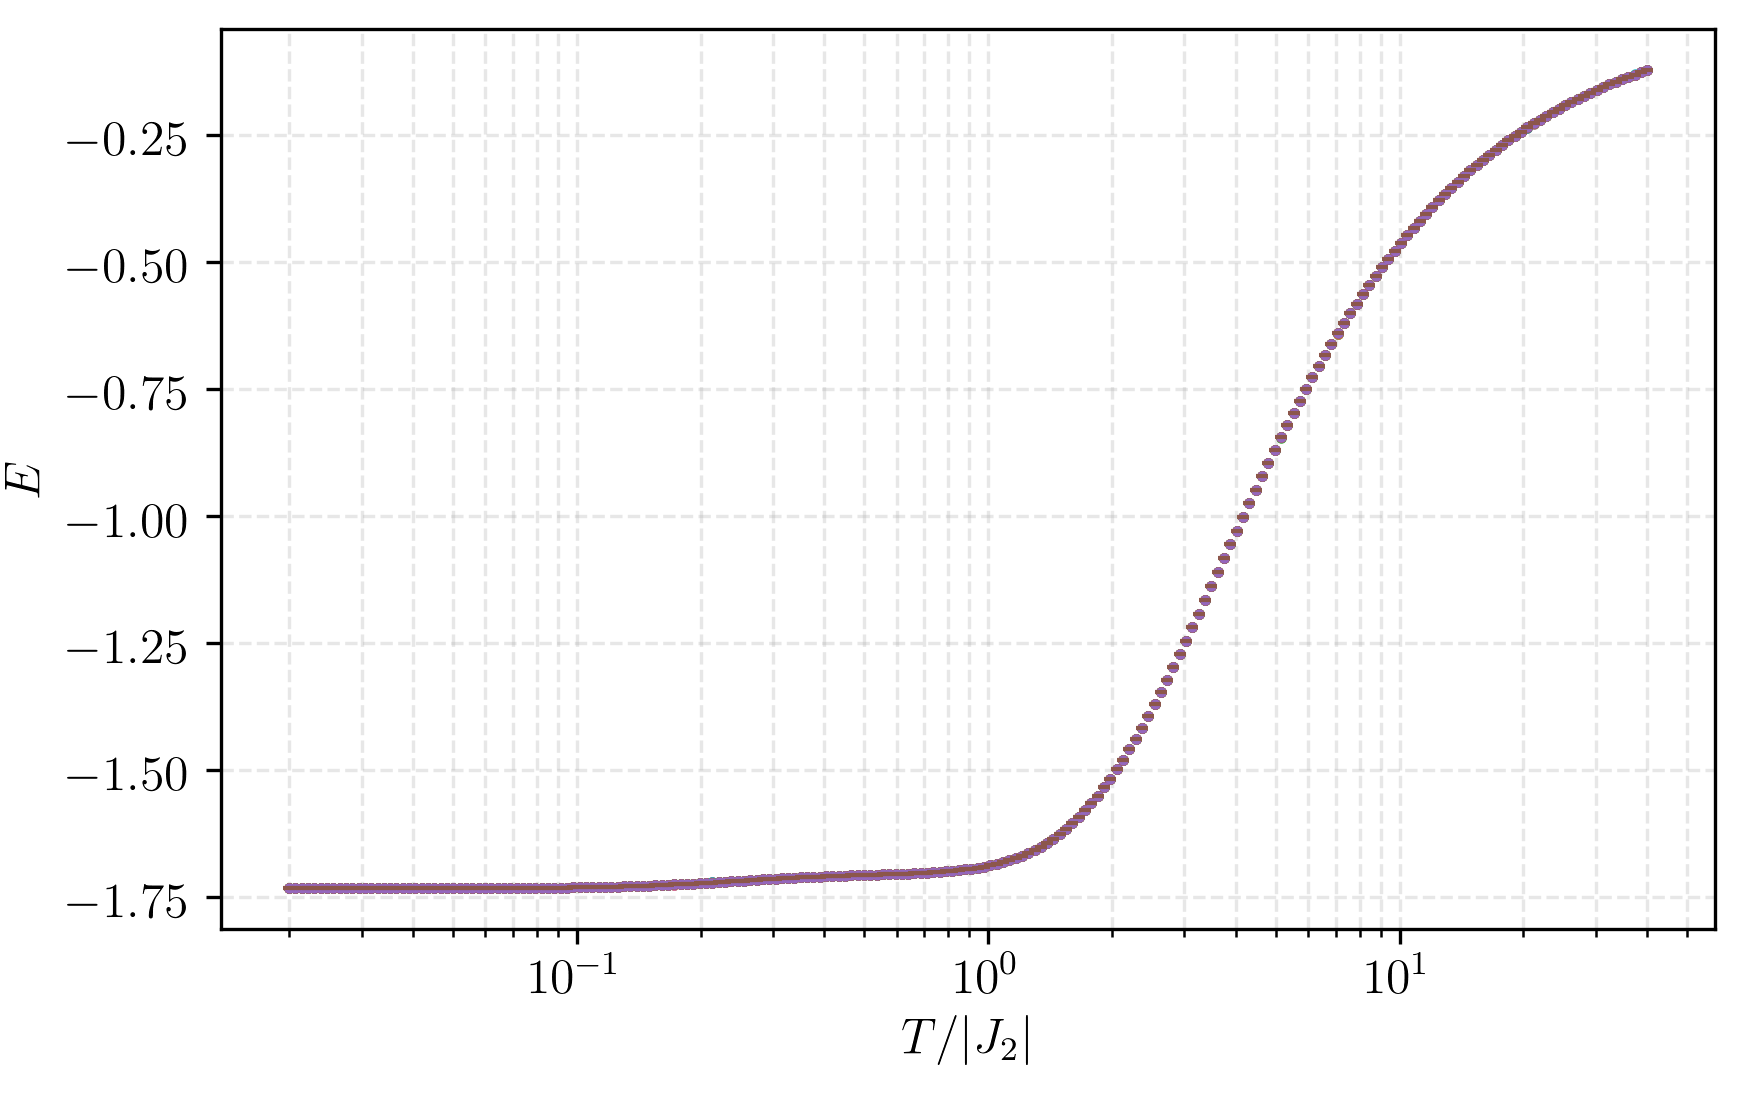

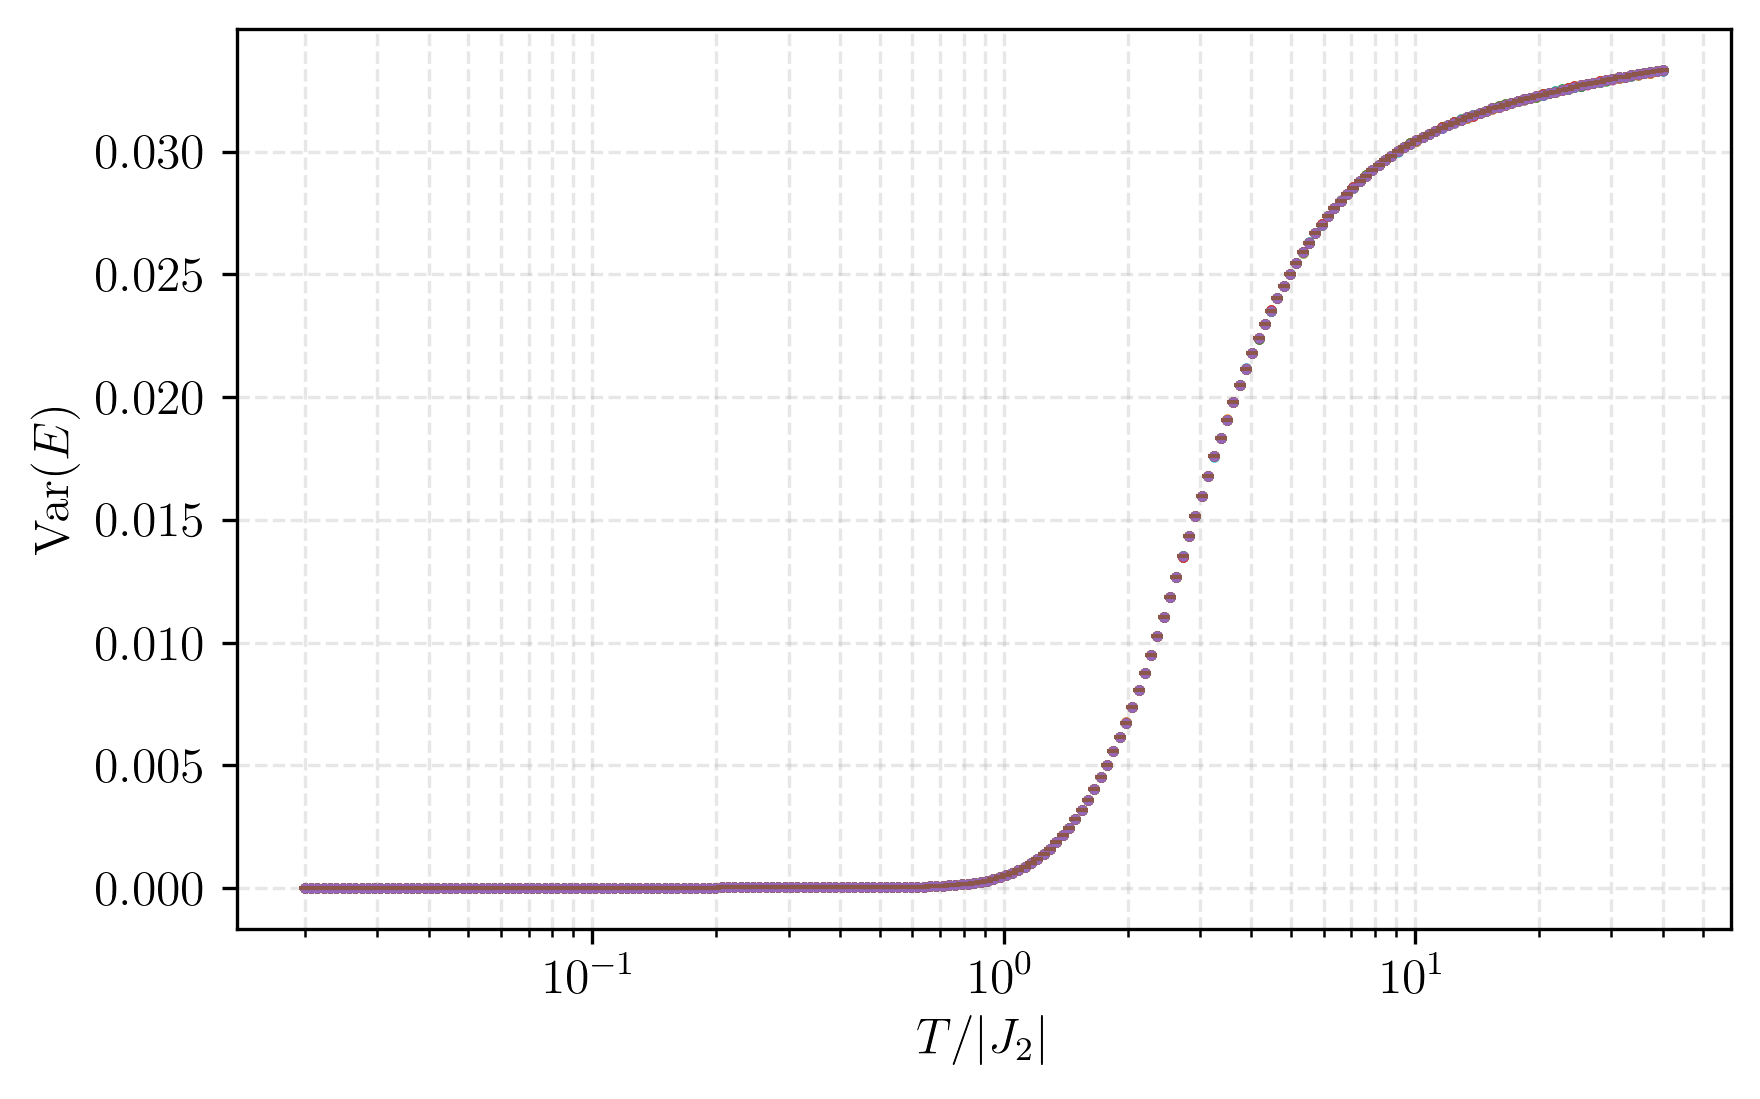

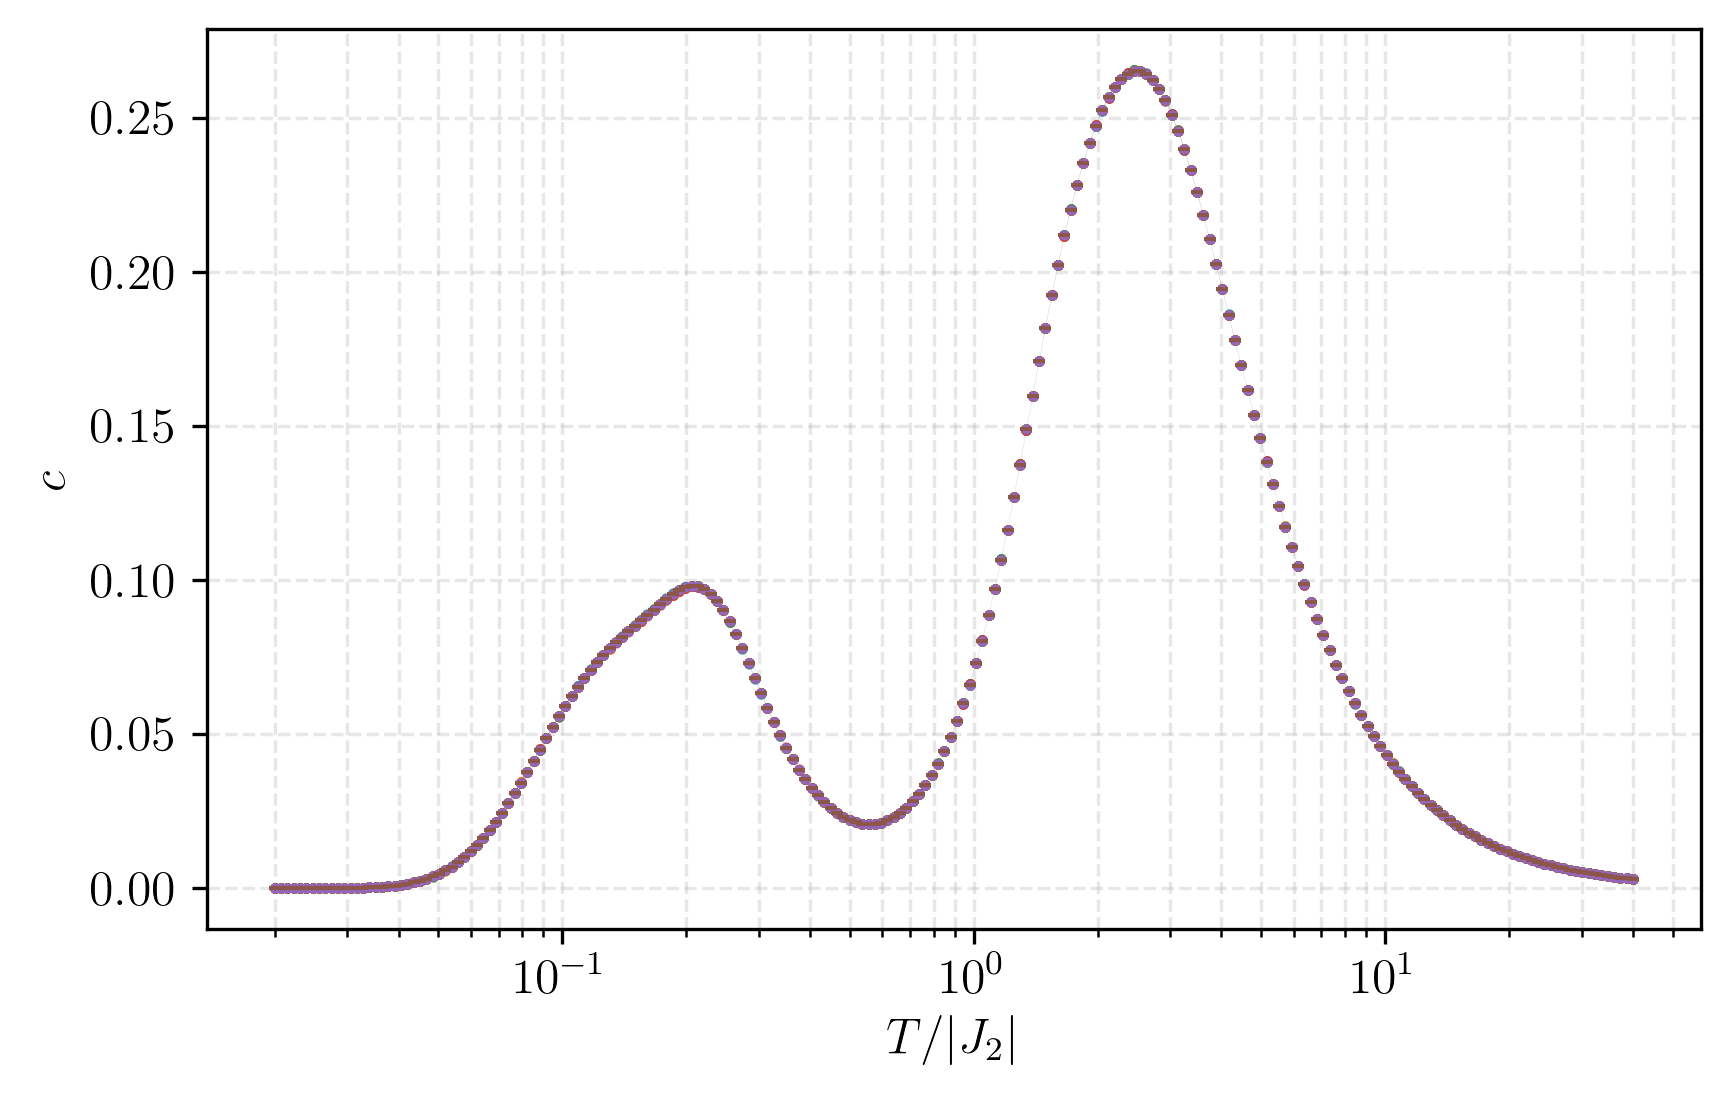

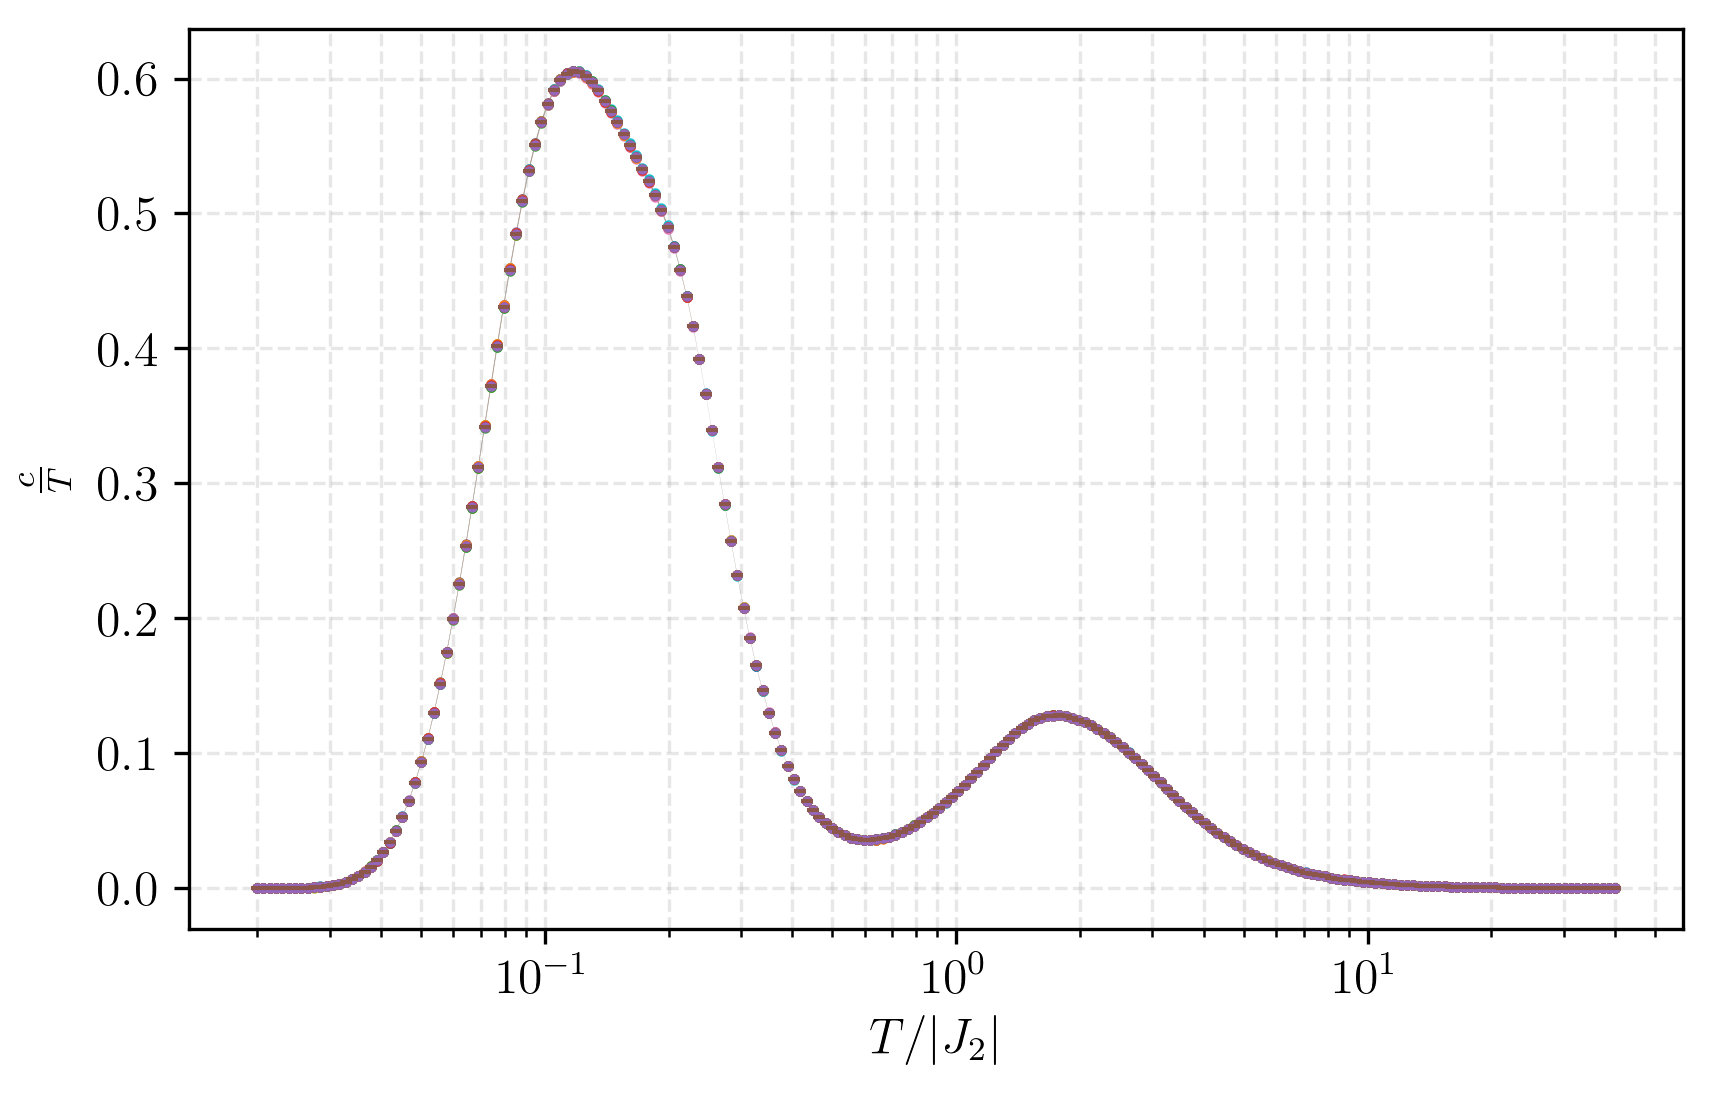

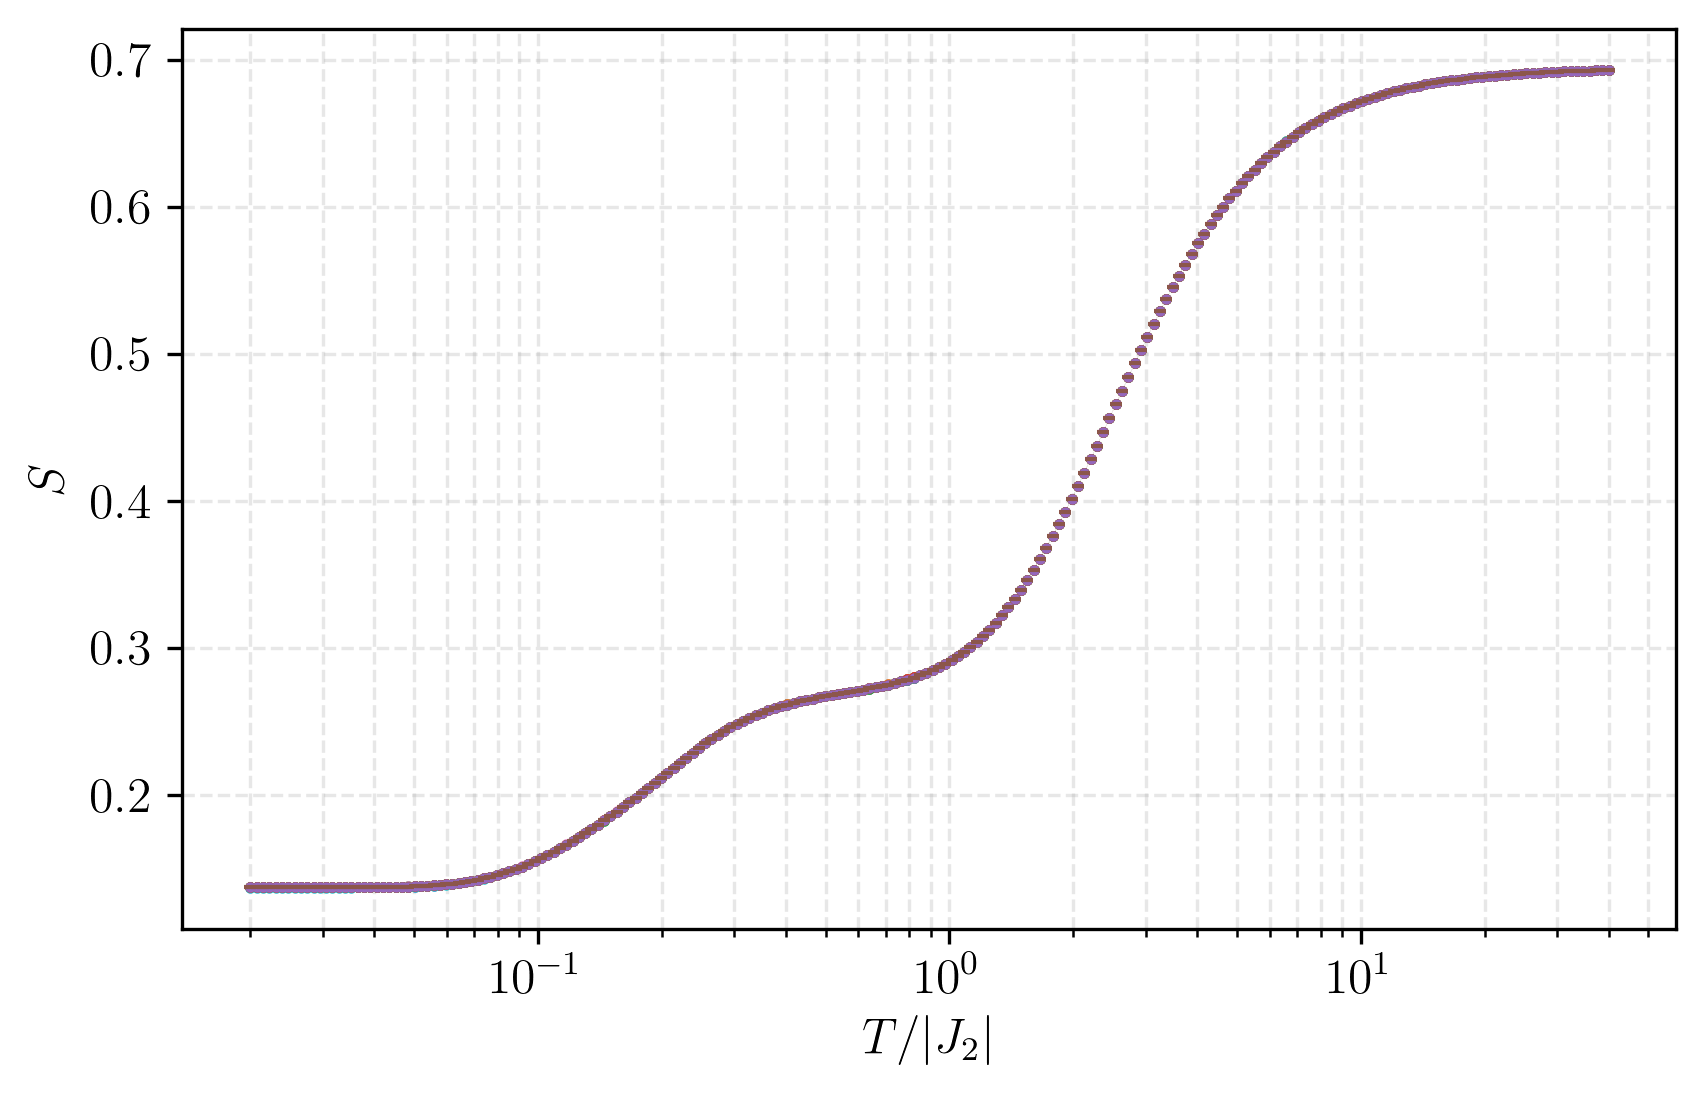

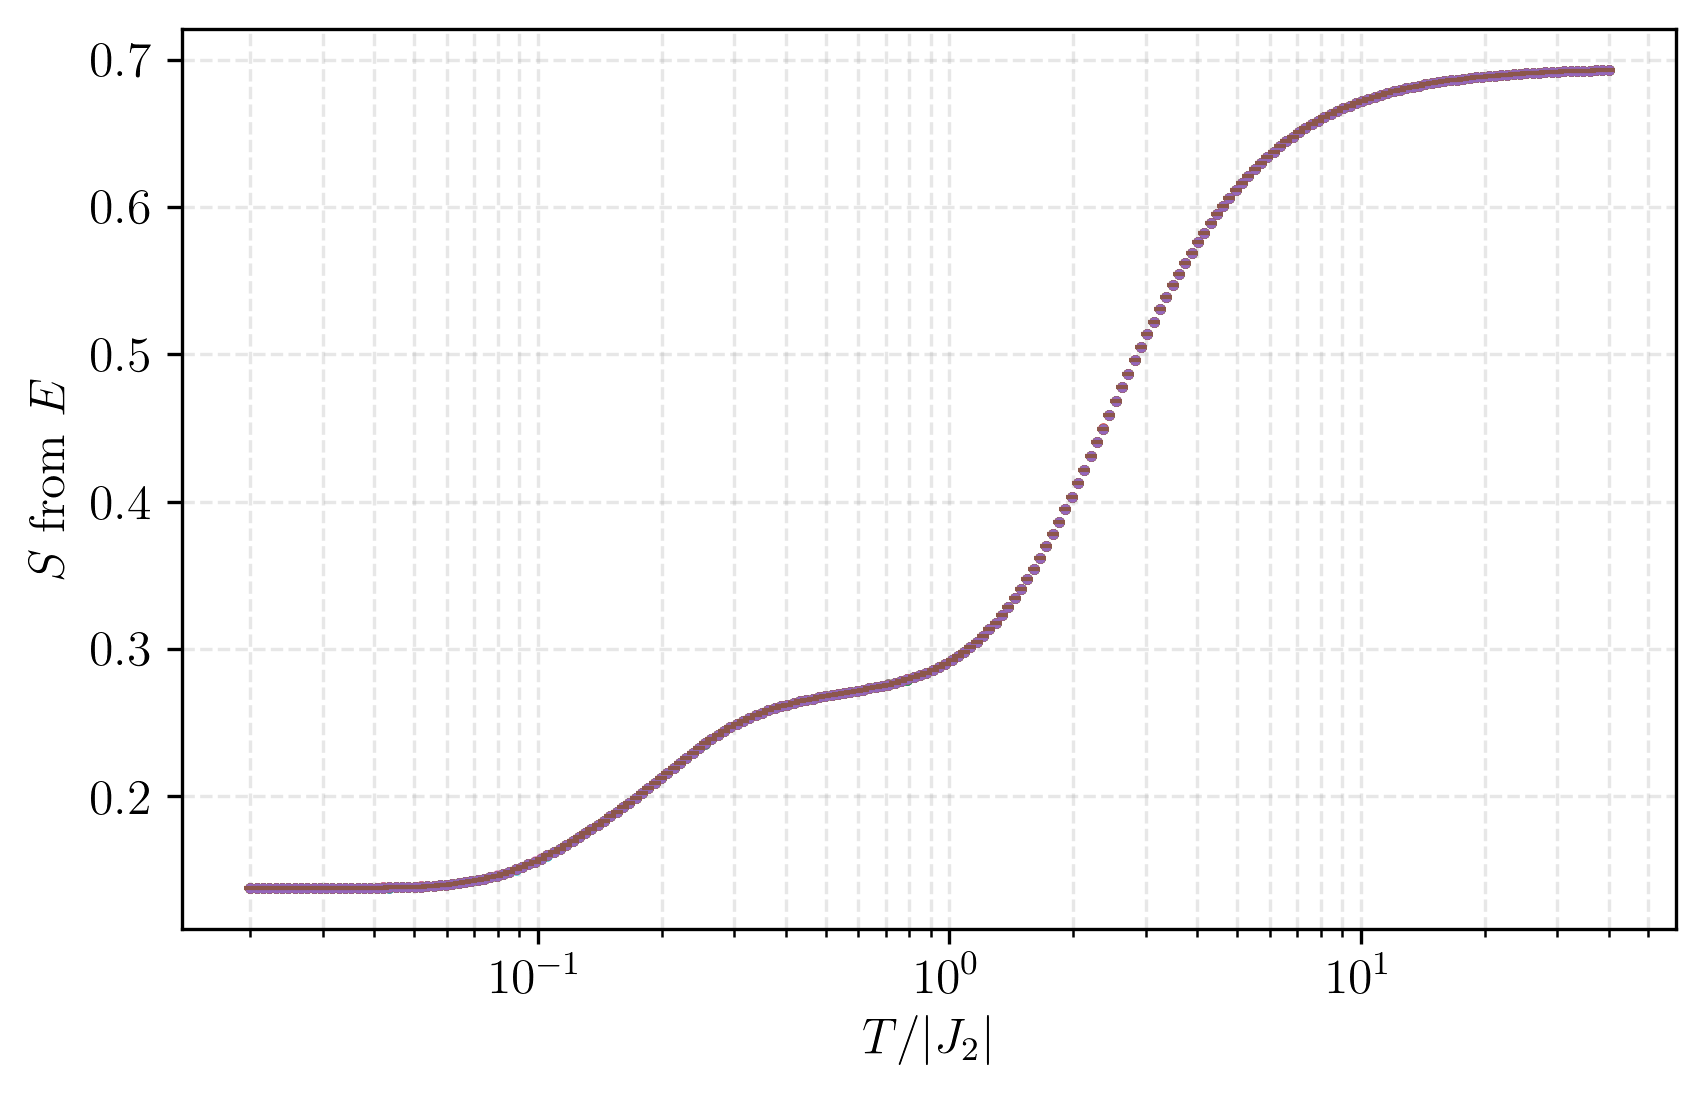

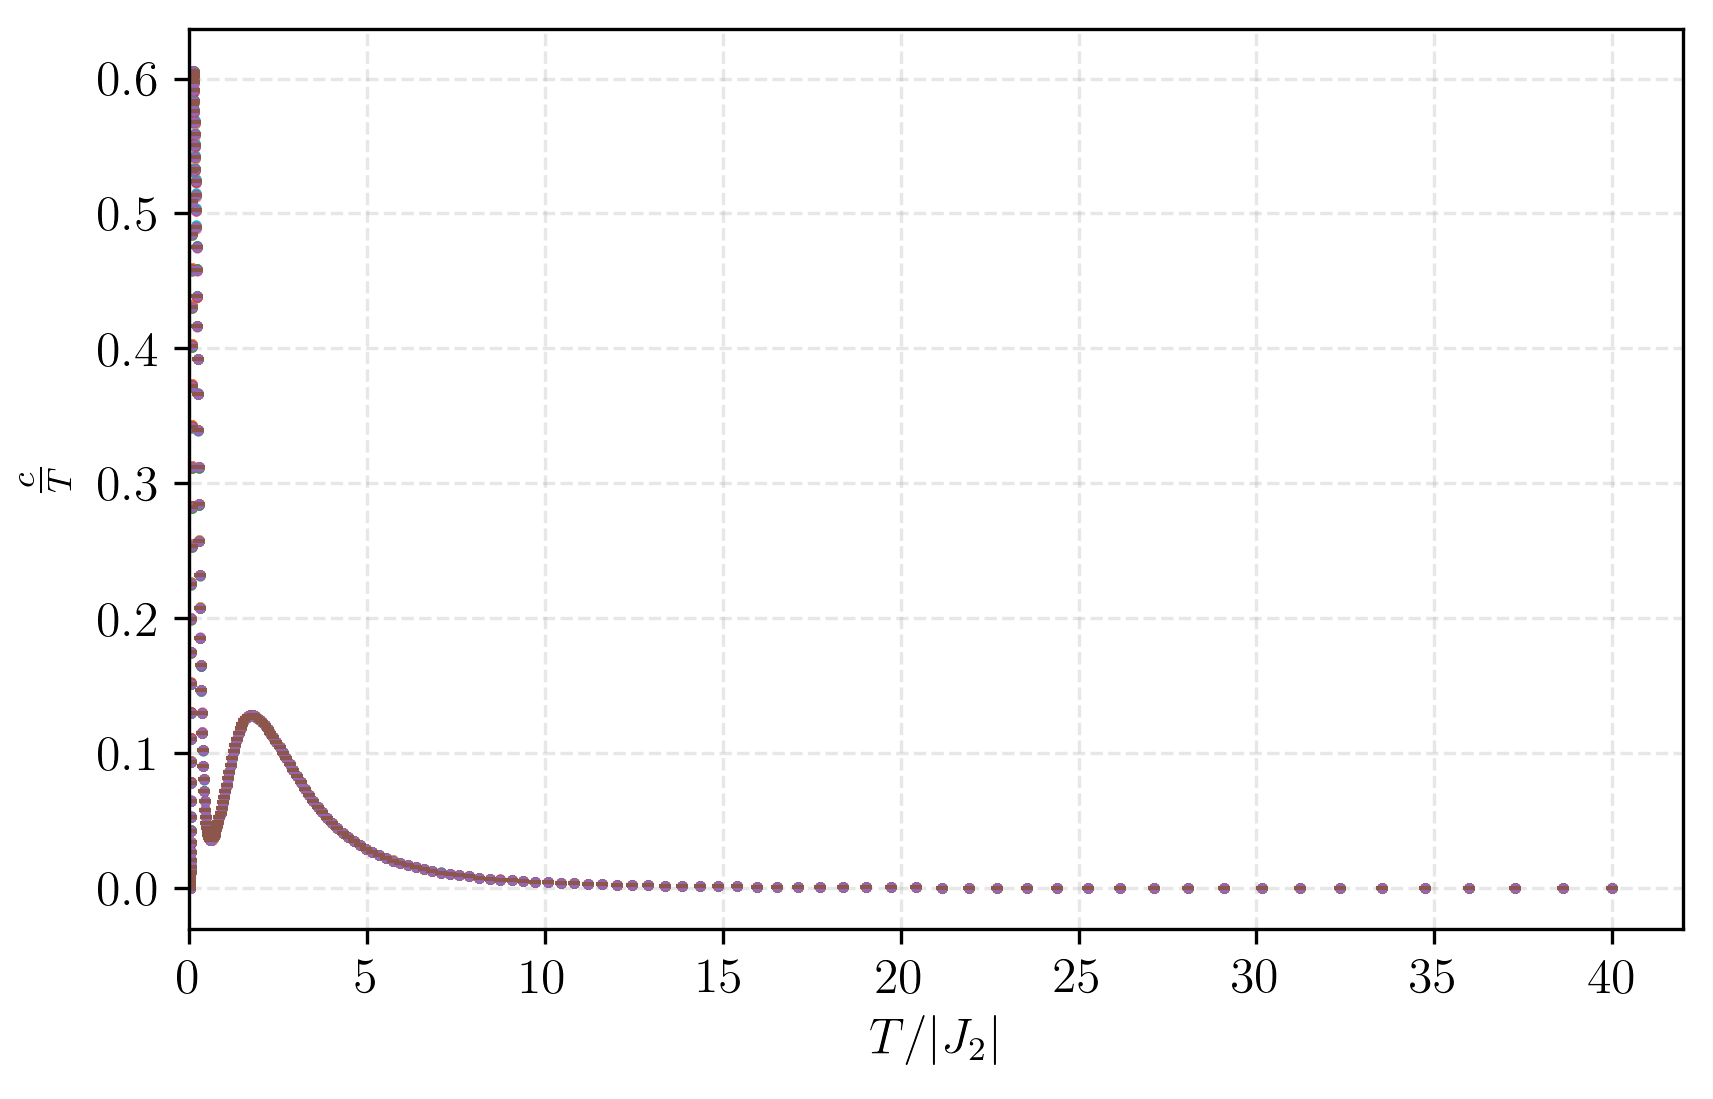

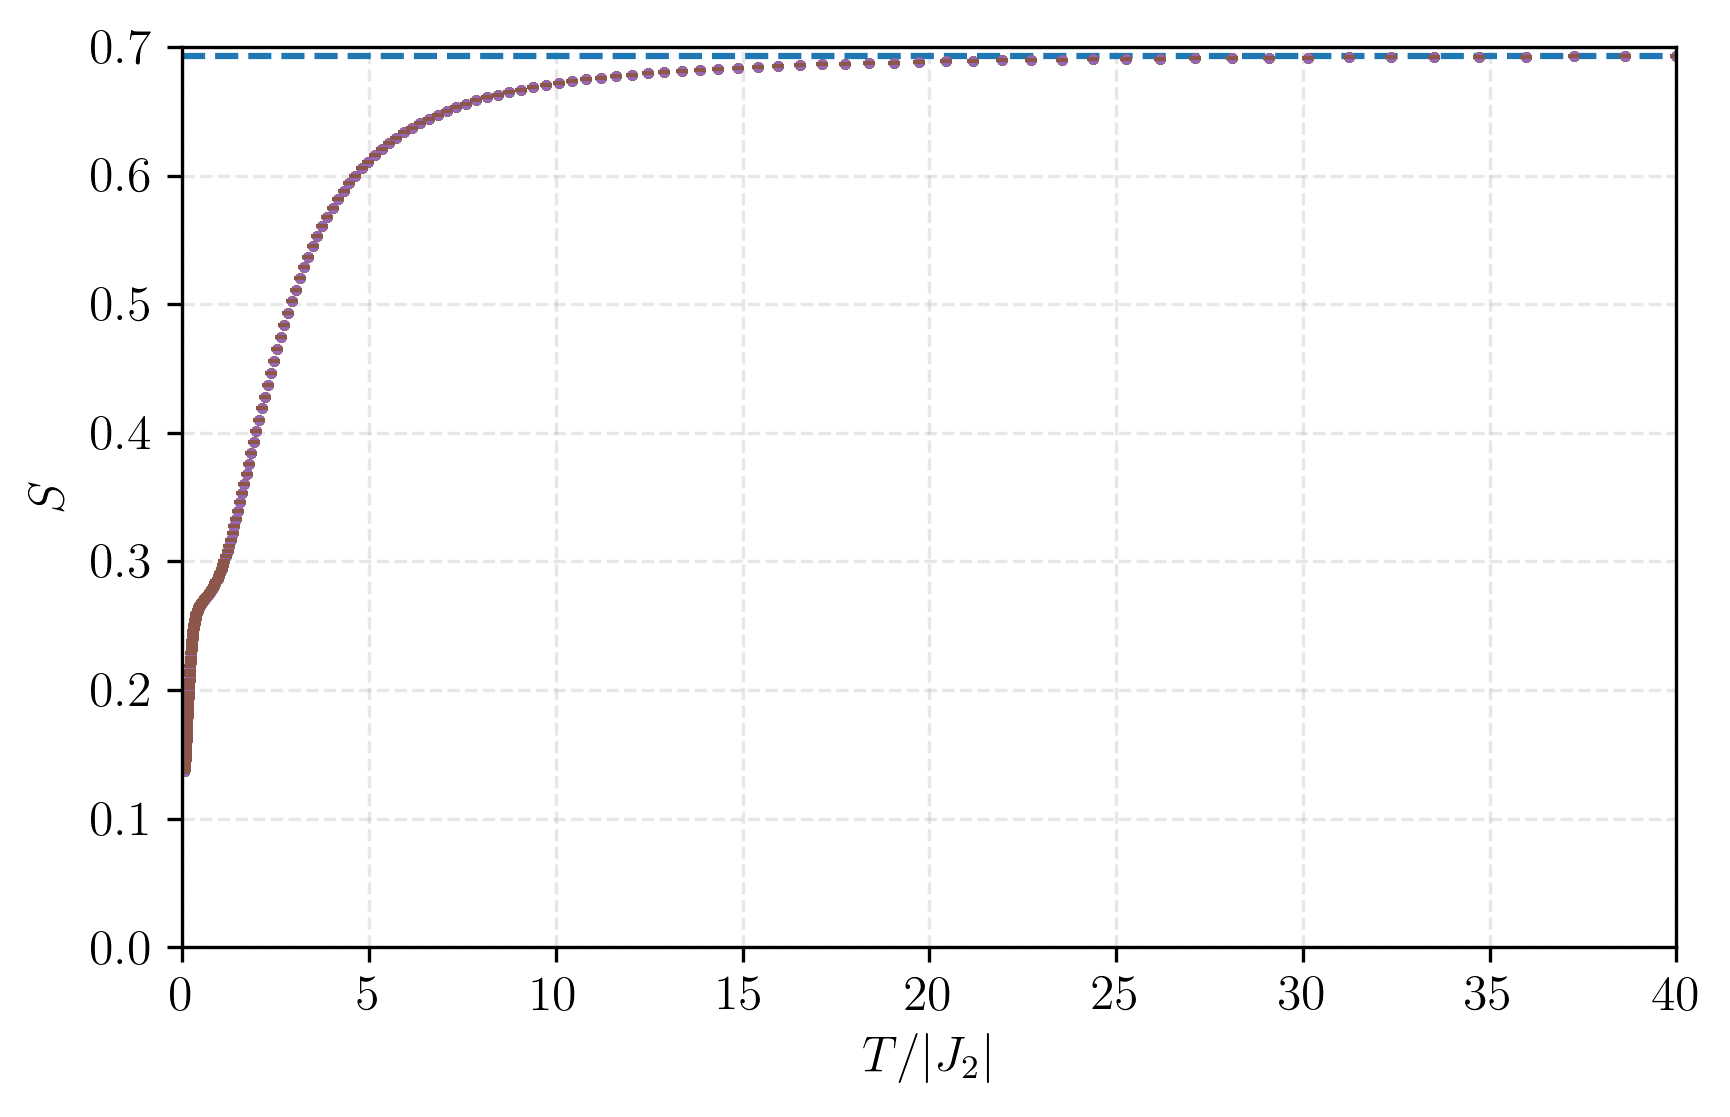

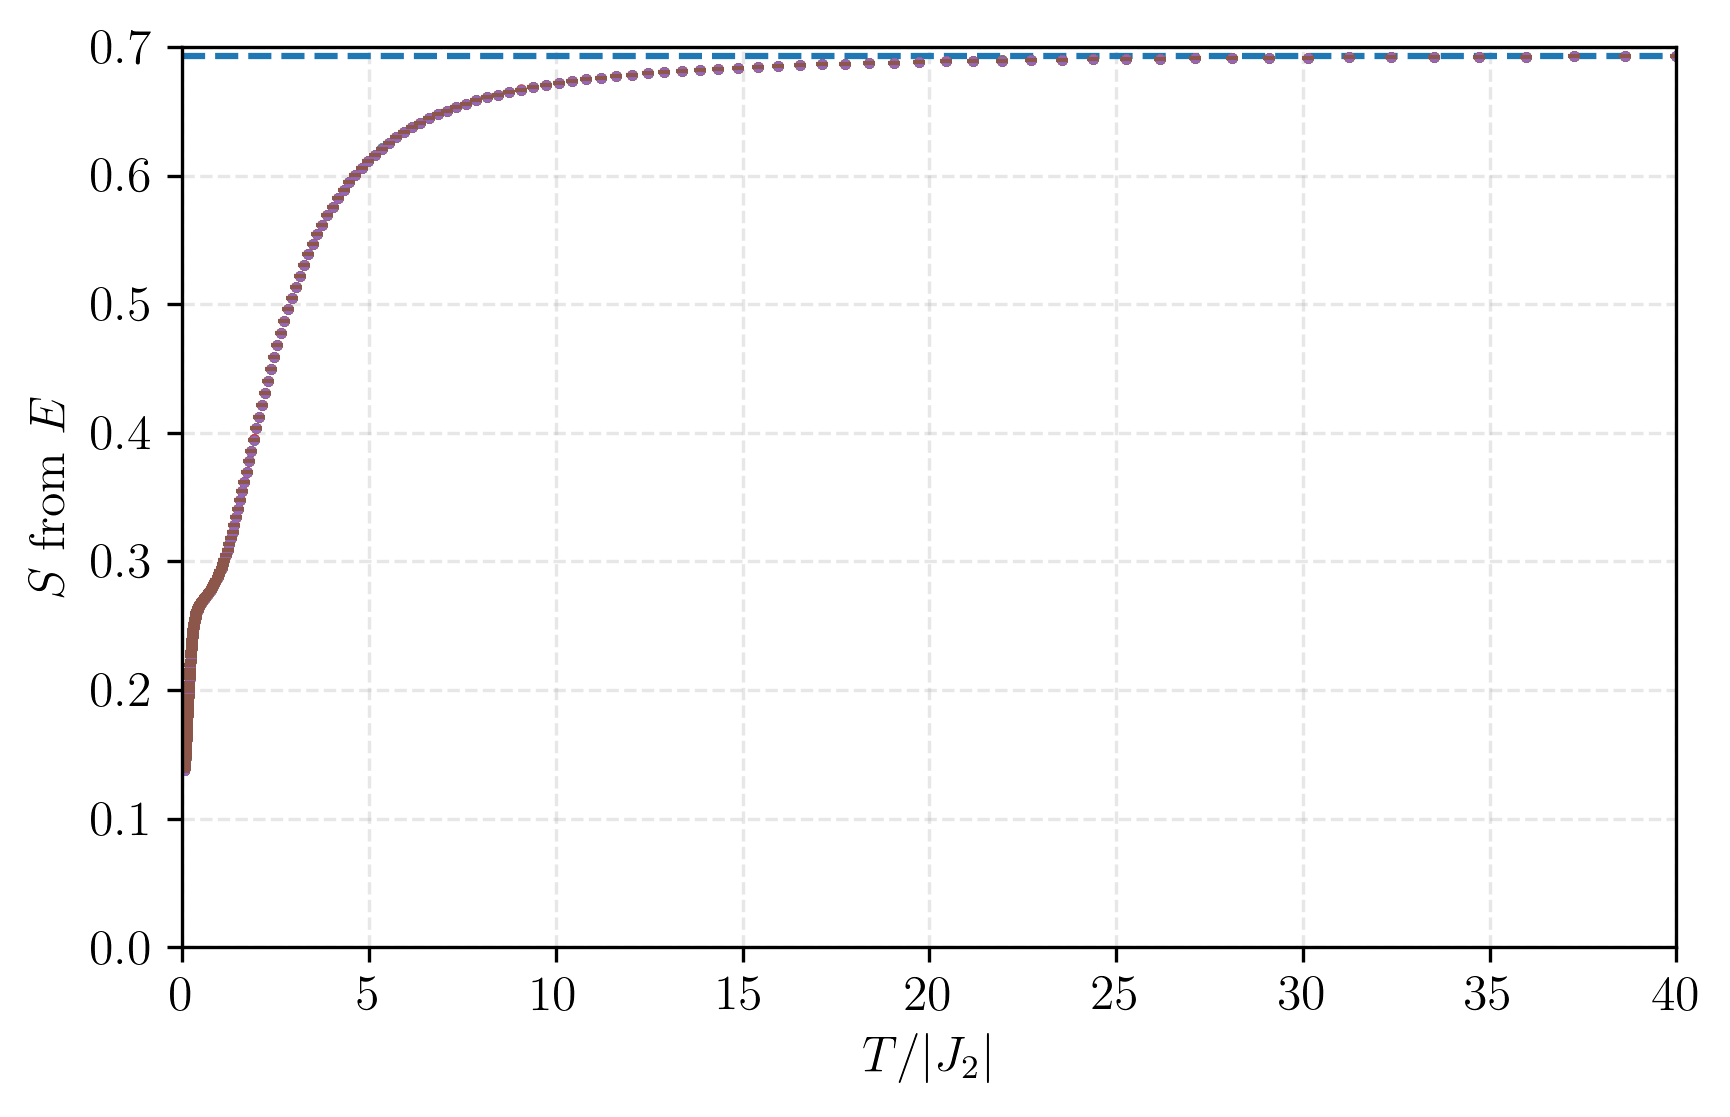

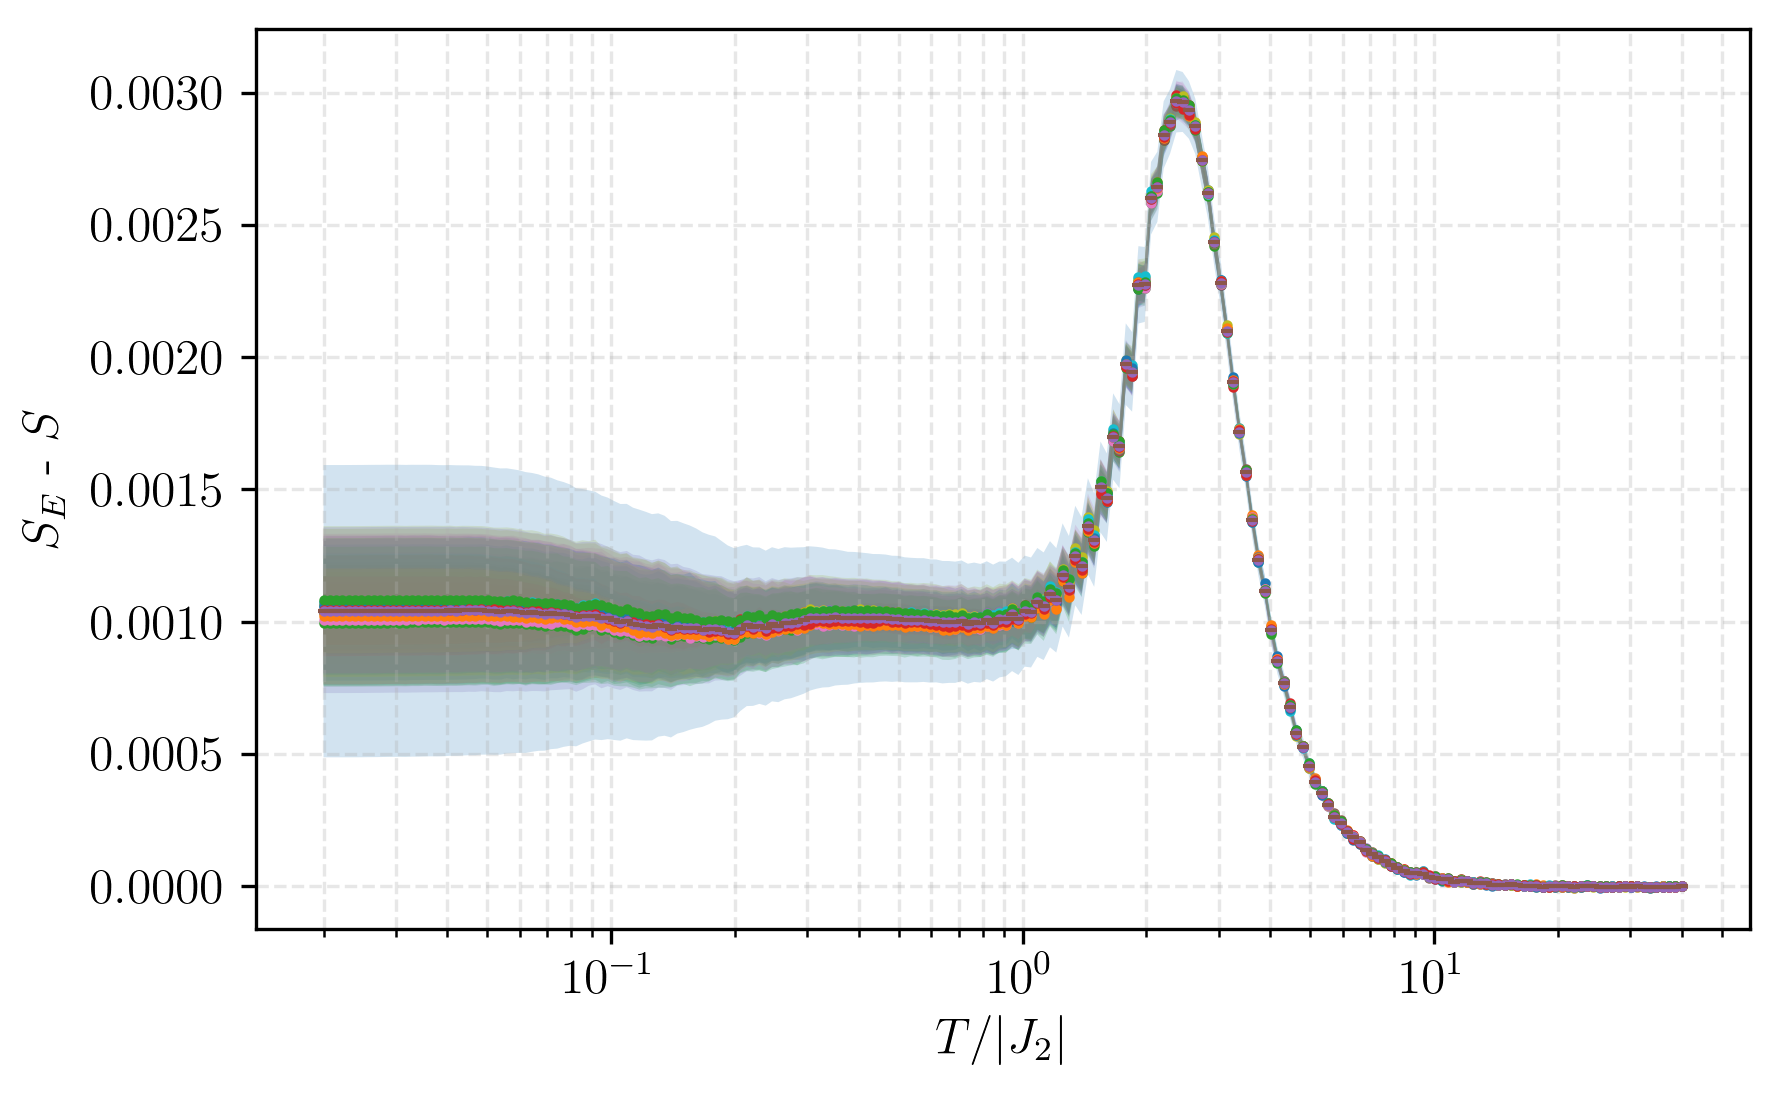

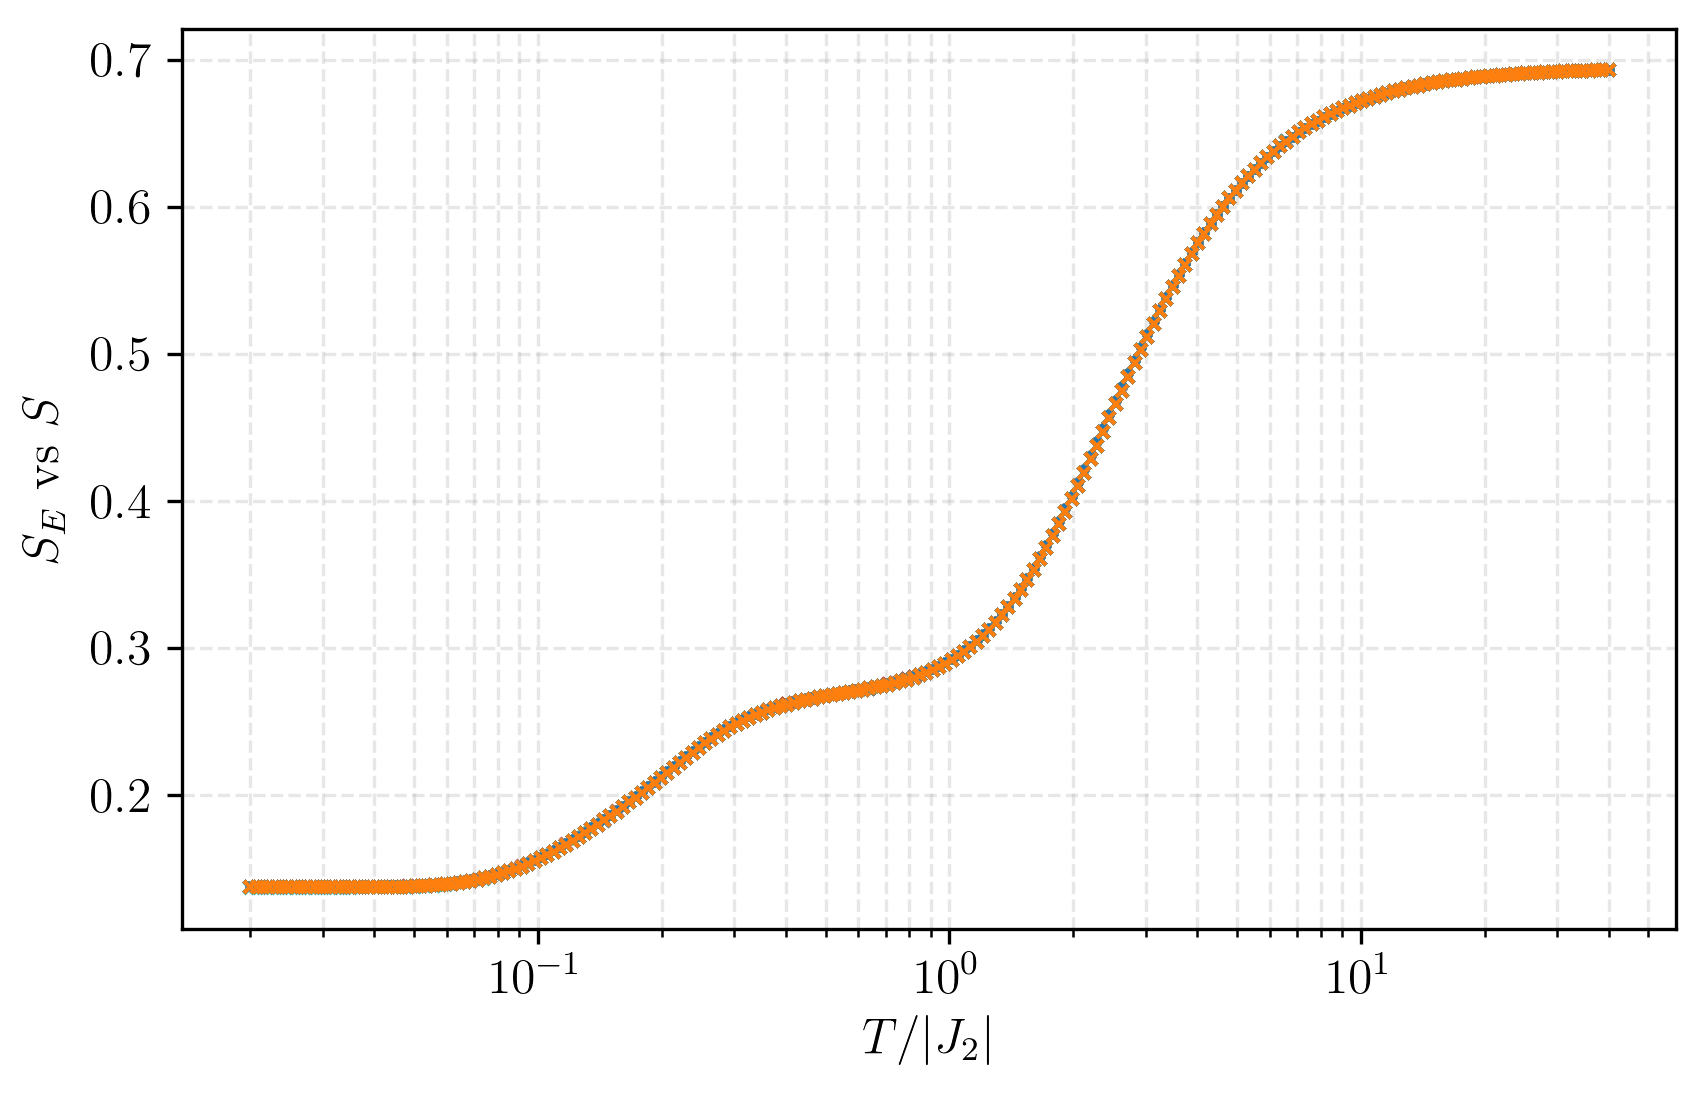

In [21]:
tidmin = 0#0
tidmax = [216 for i in range(nf)]
fmts = ['.' for i in range(nf-1)]
fmts.append('_')
pltfill = [True for i in range(nf-1)]
pltfill.append(True)

print(fmts)
addsave = "_Bootstrap_"
put_legend = False
af.BulkPlotsE(L, nf, 0, tidmin, tidmax, temperatures_plots, foldername,
                results_foldername, filenamelist, boot_t_h_MeanE, boot_t_h_MeanEsq, boot_t_h_varMeanE,
                boot_t_h_varMeanEsq,  boot_t_h_VarE, boot_t_h_ErrVarE,
              boot_C, boot_ErrC, J1, J2, J3, J4,
              boot_t_h_S, boot_t_h_Smin, boot_t_h_Smax,
              boot_t_h_SE, boot_t_h_SEmin, boot_t_h_SEmax,addsave = addsave,
              figsize = (6,4), markersize = 3, ncol = 2, loc = 'upper right',
              put_legend = put_legend, alpha = 0.1, fmts = fmts, pltfill = pltfill)

In [22]:
saveruns = input("Save runs?")

Save runs?True


In [23]:
if saveruns:
    print("saving runs")
    np.savetxt(foldername + results_foldername + "/AvgS.txt",boot_t_h_S[-1])
    np.savetxt(foldername + results_foldername + "/AvgSmin.txt", boot_t_h_Smin[-1])
    np.savetxt(foldername + results_foldername + "/AvgSmax.txt", boot_t_h_Smax[-1])
    np.savetxt(foldername + results_foldername + "/AvgSE.txt",boot_t_h_SE[-1])
    np.savetxt(foldername + results_foldername + "/AvgSEmin.txt", boot_t_h_SEmin[-1])
    np.savetxt(foldername + results_foldername + "/AvgSEmax.txt", boot_t_h_SEmax[-1])
    np.savetxt(foldername + results_foldername + "/AvgC.txt", boot_C[-1])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", boot_ErrC[-1])
    np.savetxt(foldername + results_foldername + "/VarE.txt", boot_t_h_VarE[-1])
    np.savetxt(foldername + results_foldername + "/ErrVarE.txt", boot_t_h_ErrVarE[-1])

saving runs


In [24]:
print(foldername + results_foldername)

../../MFUs/Runs_15-09-20_EasyPhase_L4/Results_02-12-20_nsms524288x4_nips2/
